In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib
import seaborn as sns
%matplotlib inline

<h1><u>Trabajo Aprendizaje Automático</u></h1>

## Índice

- [Breve introducción al trabajo](#Breve-introducción-al-trabajo)
- [Análisis descriptivo](#Análisis-descriptivo)
- [Análisis de correlaciones](#Análisis-de-correlaciones)
- [Generación de muestras](#Generación-de-muestras)
- [Selección de variables](#Selección-de-variables)
- [Modelos de clasificación](#Modelos-de-clasificación)
- [Conclusiones](#Conclusiones)

## Breve introducción al trabajo

En este documento se tratará un conjunto de datos para resolver un problema de clasificación multiclase utilizando técnicas de aprendizaje automático. El objetivo del problema es tener la capacidad de determinar la localización de proteínas E.coli a través de ciertas características celulares. 

En este trabajo se manejan distintas técnicas de aprendizaje automático y se añadirán algunas técnicas de preparación de datos para lograr explotar los resultados.

## Análisis descriptivo

Comienzo haciendo un análisis descriptivo del conjunto de datos propuesto. Para ello, se lleva a cabo un análisis de cada característica del conjunto y de la variable respuesta. 

Para realizar este análisis, se comienza cargando el conjunto de datos en la variable *data*. En esta sección para facilitar los análisis se hará uso del módulo *pandas*.

In [2]:
data=pd.read_csv('Dataset.txt',sep=',',names = ['mcg','gch','lip','chg','aac','alm1','alm2','Clase'],header=None)

Empiezo mostrando el nombre y el significado de las 7 variables explicativas del dataset.

-  mcg: método de McGeoch para el reconocimiento de secuencias de señales.
-  gch: método de von Heijne para el reconocimiento de secuencias de señales.
-  lip: puntuación de la secuencia de consenso de la Peptidasa II de la señal de von Heijne.
-  chg: Presencia de carga en el extremo N de las lipoproteínas predichas.
-  aac: puntuación del análisis discriminante del contenido de aminoácidos de la membrana externa y las proteínas periplásmicas.
-  alm1: puntuación del programa de predicción de la región que atraviesa la membrana de ALOM.
-  alm2: puntuación del programa ALOM después de excluir regiones señal escindibles putativas de la secuencia.

Finalmente, cito las posibles clasificaciones que pueden tener nuestros datos:

- Citoplasma (0)
- Membrana interna sin secuencia de señal (1)
- Periplasma (2)
- Membrana interna – secuencia de señal no escindible (3)
- Membrana externa (4)
- Lipoproteína de membrana externa (5)
- Lipoproteína de membrana interna (6)
- Membrana interna – secuencia de señal escindible (7)

Avanzando con el tema, muestro el encabezado de nuestro conjunto de datos ,el tipo de los datos que hay en el dataset y una breve descripción de estos.

In [3]:
data.head()

,mcg,gch,lip,chg,aac,alm1,alm2,Clase
0,0.34,0.51,0.48,0.5,0.67,0.90,0.90,1.0
1,0.39,0.31,0.48,0.5,0.38,0.34,0.43,0.0
2,0.44,0.56,0.48,0.5,0.50,0.46,0.54,0.0
3,0.71,0.57,0.48,0.5,0.48,0.35,0.32,7.0
4,0.41,0.48,0.48,0.5,0.51,0.44,0.51,0.0


In [4]:
data.dtypes

mcg      float64
gch      float64
lip      float64
chg      float64
aac      float64
alm1     float64
alm2     float64
Clase    float64
dtype: object

In [5]:
data.iloc[:,:-1].describe()

,mcg,gch,lip,chg,aac,alm1,alm2
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000
mean,0.500681,0.507702,0.497702,0.502128,0.497106,0.505447,0.501872
std,0.193904,0.146310,0.094497,0.032616,0.123866,0.211646,0.210358
min,0.000000,0.160000,0.480000,0.500000,0.000000,0.110000,0.000000
25%,0.340000,0.410000,0.480000,0.500000,0.420000,0.330000,0.345000
50%,0.500000,0.480000,0.480000,0.500000,0.490000,0.470000,0.430000
75%,0.670000,0.570000,0.480000,0.500000,0.570000,0.710000,0.695000
max,0.890000,1.000000,1.000000,1.000000,0.880000,1.000000,0.990000


Por un lado, se observa que se han cargado correctamente los datos y que todas las variables son de tipo numérico (*float*), algo a tener en cuenta a la hora de generar los modelos (debido a que si hubiese variables cualitativas habría que transformarlas).

Por otro lado, se visualiza que todas las variables se mueven en un rango similar (entre 0 y 1 en general), por lo que considero que no será necesaria una estandarización de las variables.

A continuación, se analiza cada variable individualmente y con el objetivo de que el algoritmo aprenda correctamente, se examinará la existencia de *outliers* dentro de estas variables. Ya se sabe que este tipo de datos con características considerablemente diferentes pueden llegar a alterar el proceso de aprendizaje del modelo, perjudicando así la calidad de este. 

### Variables explicativas

**MCG**

Comienzo tratando las variables explicativas del dataset y empiezo por la característica **mcg**. Primero de todo mostraré una breve descripción de esta variable y luego, pasaré a analizar su distribución.

In [6]:
data['mcg'].describe()

count    235.000000
mean       0.500681
std        0.193904
min        0.000000
25%        0.340000
50%        0.500000
75%        0.670000
max        0.890000
Name: mcg, dtype: float64

<AxesSubplot:xlabel='mcg', ylabel='Count'>

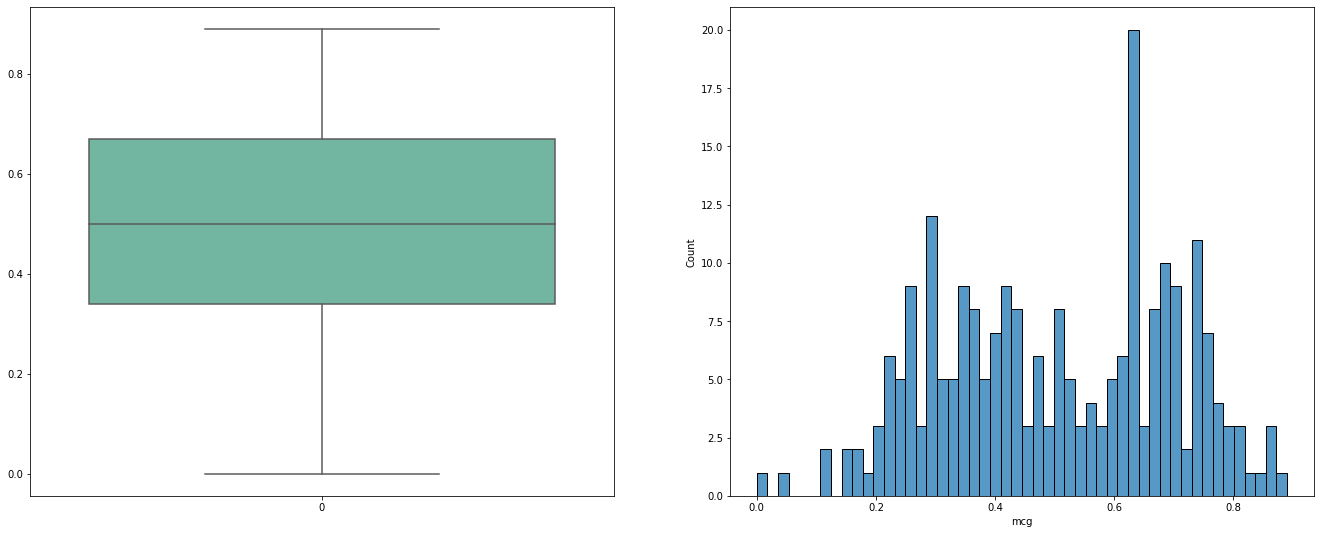

In [7]:
fig, axs = plt.subplots(ncols=2,figsize=(23,9))

sns.boxplot(data=data['mcg'],ax=axs[0],palette='Set2')

sns.histplot(data=data['mcg'], bins=50,ax=axs[1])

Se puede observar que la variable **mcg** se mueve en un intervalo de 0 y 0.9 aproximadamente. Tal y como he dicho, el rango de valores que toman todas las características es similar al intervalo (0,1).

Luego, se contempla que hay una distribución general muy compacta donde no se observa ningún dato con cualidades de *outlier*. Sin embargo, esta gráfica no es del todo correcta, ya que se debe observar también la distribución de esta variable según a la clase a la que pertenece cada dato. Se debe analizar de esta manera ya que puede llegar a haber algunos *outliers* dentro de estos subconjuntos, debido a que, cada clase tomará unos rangos de valores diferentes en cada característica y habrá instancias que pertenecen a una clase pero que toman un valor muy diferente a la distribución de su clase a pesar de estar dentro de la distribución general.

<AxesSubplot:xlabel='Clase', ylabel='mcg'>

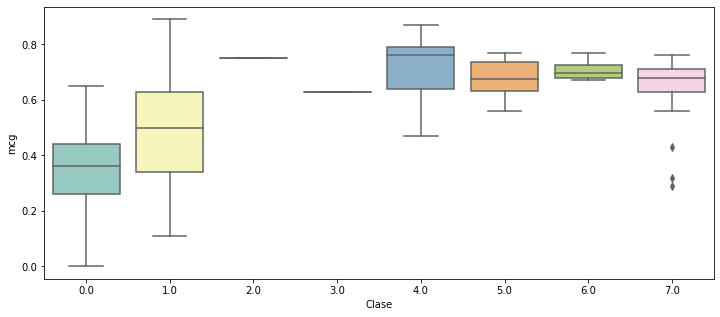

In [8]:
plt.figure(figsize=(12,5))
sns.boxplot(y='mcg', x='Clase' ,data=data,palette='Set3')

Se observa que en la distribución correspondiente a la clase 7, se encuentran algunos valores que pueden ser candidatos a *outliers*. Para ello, hago uso del criterio del rango intercuartílico y analizo esos datos. 

Durante el proceso de detección de *outliers*, voy a proceder a utilizar un punto de corte con valor 3 generalmente; es decir, sólo se detectarán los *outliers extremos* (a excepción de las clases mayoritarias donde analizaré la posibilidad de reducir esta restricción).

In [9]:
def deteccionOutilers_IQR(data, k=1.5):
    resumen=data.describe()
    IQR=resumen.loc['75%']-resumen.loc['25%']
    l1=data>(k*IQR+resumen.loc['75%'])
    l2=data<(-k*IQR+resumen.loc['25%'])
    return np.logical_or(l1,l2)

In [10]:
k=3

In [11]:
print('Número de datos de la clase 7: {}'.format((data['Clase']==7).sum()))
outliersMGC=deteccionOutilers_IQR(data['mcg'][data['Clase']==7],k)
print('Numero de outliers detectados con la tecnica de IQR: ',outliersMGC.sum())
print('Visualizamos caules son los outliers\n{}'.format(data['mcg'][data['Clase']==7][outliersMGC]))

Número de datos de la clase 7: 36
Numero de outliers detectados con la tecnica de IQR:  2
Visualizamos caules son los outliers
13     0.32
109    0.29
Name: mcg, dtype: float64


Gracias al código anterior expongo que de los 36 datos correspondientes a la clase 7, 2 son detectados como *outliers extremos*. En otros casos estos datos serían eliminados de la base de datos ya que pueden llegar a ser perjudiciales para el entrenamiento y pueden proporcionar malos resultados; sin embargo, en este caso no hay un gran dataset, por lo que no eliminaré estos datos pero tampoco los usaré para validar ni entrenar el clasificador, solo haré uso de ellos para ver si el modelo final es capaz de generalizar datos que incluso tienen rasgos fuera de lo común a los de su clase. He de decir, que los resultados que se obtendrán con estos datos realmente no serán relevantes y una mala salida no debe ser preocupante ya que se tratan de *outliers extremos*.

También, he de comentar que si se disminuye el valor del punto de corte de la estrategia, aparece otro dato candidato a *outlier* (el dato 160) pero la cantidad de datos de esta clase no es muy amplia por lo que no lo considero como *outlier*.

**GCH**

Continúo con la variable correspondiente a los valores tomados con el método von Heijne y repito el procedimiento anterior.

In [12]:
data['gch'].describe()

count    235.000000
mean       0.507702
std        0.146310
min        0.160000
25%        0.410000
50%        0.480000
75%        0.570000
max        1.000000
Name: gch, dtype: float64

<AxesSubplot:xlabel='gch', ylabel='Count'>

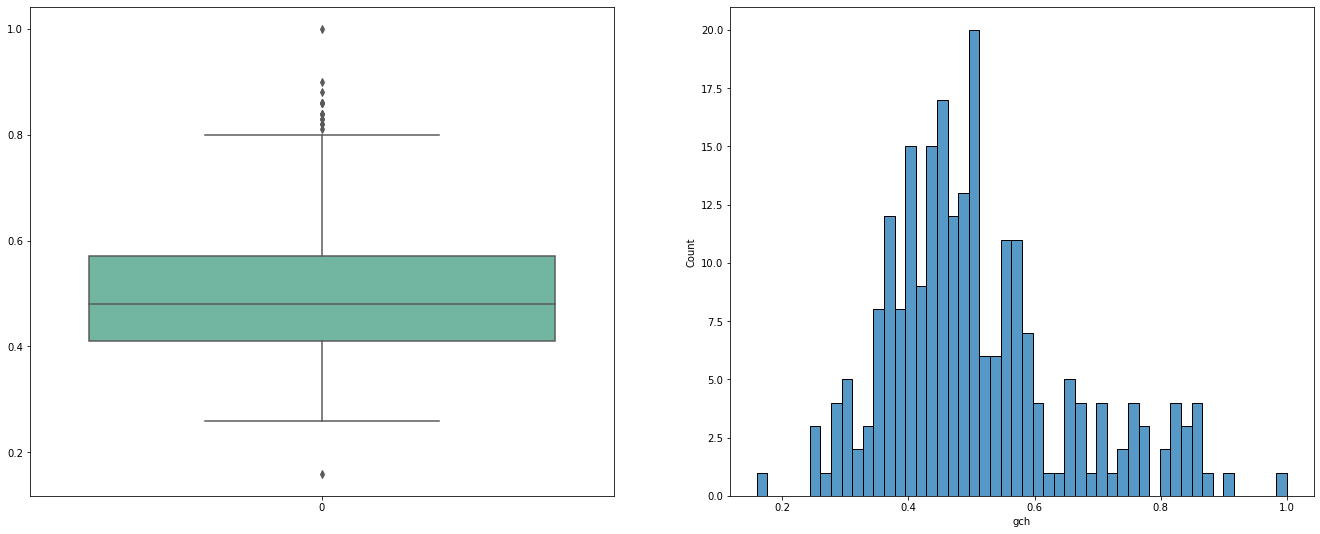

In [13]:
fig, axs = plt.subplots(ncols=2,figsize=(23,9))

sns.boxplot(data=data['gch'],ax=axs[0],palette='Set2')

sns.histplot(data=data['gch'], bins=50,ax=axs[1])

Con el rango de valores que toma la variable, vuelvo a verificar lo dicho, los valores de las variables oscilan en el intervalo (0,1).

En este caso también hay una distribución general compacta; sin embargo, se visualizan algunos datos que se pueden llegar a apreciar como *outliers*.  No obstante no podemos llegar a esta conclusión, dado que hay que analizar la distribución de esta característica por cada clase como ya he tratado en el caso anterior, ya que unos datos pueden tener unos valores muy alejados a la distribución general del conjunto pero no a la distribución de la clase a la que pertenece.

<AxesSubplot:xlabel='Clase', ylabel='gch'>

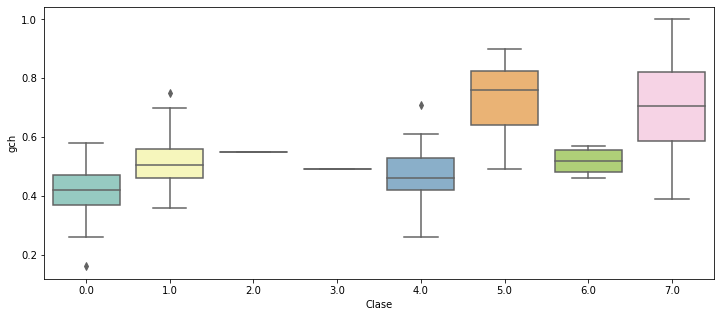

In [14]:
plt.figure(figsize=(12,5))
sns.boxplot(y='gch', x='Clase' ,data=data,palette='Set3')

Se observa que en las distribuciones correspondientes a las clase 0, 1 y 4, hay datos candidatos a ser *outliers*. Sin embargo, cabe mencionar que no se observan tantos valores anómalos como en la distribución general; por ello, se refuerza la idea de analizar por cada clase, si no se podrían estar eliminando datos de gran interés para el aprendizaje. Ahora realizo un análisis individual de cada clase para la detección de los *outliers*.

In [15]:
k=3

In [16]:
print('Número de datos de la clase 0: {}'.format((data['Clase']==0).sum()))
outliersGCH0=deteccionOutilers_IQR(data['gch'][data['Clase']==0],k)
print('Numero de outliers detectados con la tecnica de IQR: ',outliersGCH0.sum())
print('Visualizamos caules son los outliers\n{}'.format(data['gch'][data['Clase']==0][outliersGCH0]))

Número de datos de la clase 0: 100
Numero de outliers detectados con la tecnica de IQR:  0
Visualizamos caules son los outliers
Series([], Name: gch, dtype: float64)


In [17]:
print('Número de datos de la clase 1: {}'.format((data['Clase']==1).sum()))
outliersGCH1=deteccionOutilers_IQR(data['gch'][data['Clase']==1],k)
print('Numero de outliers detectados con la tecnica de IQR: ',outliersGCH1.sum())
print('Visualizamos caules son los outliers\n{}'.format(data['gch'][data['Clase']==1][outliersGCH1]))

Número de datos de la clase 1: 54
Numero de outliers detectados con la tecnica de IQR:  0
Visualizamos caules son los outliers
Series([], Name: gch, dtype: float64)


In [18]:
print('Número de datos de la clase 4: {}'.format((data['Clase']==4).sum()))
outliersGCH4=deteccionOutilers_IQR(data['gch'][data['Clase']==4],k)
print('Numero de outliers detectados con la tecnica de IQR: ',outliersGCH4.sum())
print('Visualizamos caules son los outliers\n{}'.format(data['gch'][data['Clase']==4][outliersGCH4]))

Número de datos de la clase 4: 25
Numero de outliers detectados con la tecnica de IQR:  0
Visualizamos caules son los outliers
Series([], Name: gch, dtype: float64)


Se observa que los datos analizados no se consideran *outliers extremos*, estableciendo el punto de corte (k) igual a 3. En cambio, si establezco el punto de corte para detectar *outliers* normales; es decir, *k=1.5* se obtiene que por cada clase hay un dato que se considera anómalo. Sin embargo, dada la escasez de datos, incremento el punto de corte a 2 para observar si los datos analizados se desvían lo suficiente como para no tenerlos en cuenta en el proceso de aprendizaje, ya que me interesa tener la mayor cantidad de datos posibles para entrenar y validar nuestro modelo.

In [19]:
k=2

In [20]:
print('Número de datos de la clase 0: {}'.format((data['Clase']==0).sum()))
outliersGCH0=deteccionOutilers_IQR(data['gch'][data['Clase']==0],k)
print('Numero de outliers detectados con la tecnica de IQR: ',outliersGCH0.sum())
print('Visualizamos caules son los outliers\n{}'.format(data['gch'][data['Clase']==0][outliersGCH0]))

Número de datos de la clase 0: 100
Numero de outliers detectados con la tecnica de IQR:  1
Visualizamos caules son los outliers
30    0.16
Name: gch, dtype: float64


In [21]:
print('Número de datos de la clase 1: {}'.format((data['Clase']==1).sum()))
outliersGCH1=deteccionOutilers_IQR(data['gch'][data['Clase']==1],k)
print('Numero de outliers detectados con la tecnica de IQR: ',outliersGCH1.sum())
print('Visualizamos caules son los outliers\n{}'.format(data['gch'][data['Clase']==1][outliersGCH1]))

Número de datos de la clase 1: 54
Numero de outliers detectados con la tecnica de IQR:  0
Visualizamos caules son los outliers
Series([], Name: gch, dtype: float64)


In [22]:
print('Número de datos de la clase 4: {}'.format((data['Clase']==4).sum()))
outliersGCH4=deteccionOutilers_IQR(data['gch'][data['Clase']==4],k)
print('Numero de outliers detectados con la tecnica de IQR: ',outliersGCH4.sum())
print('Visualizamos caules son los outliers\n{}'.format(data['gch'][data['Clase']==4][outliersGCH4]))

Número de datos de la clase 4: 25
Numero de outliers detectados con la tecnica de IQR:  0
Visualizamos caules son los outliers
Series([], Name: gch, dtype: float64)


El único dato que se mantiene como anómalo es el correspondiente a la clase cero. En los otros dos casos el dato deja de ser considerado como *outlier* y como no hay una gran cantidad de datos en esas dos clases, mantengo los datos. Sin embargo, con el dato correspondiente a la clase 0, como este subconjunto de datos considero que tiene una cantidad suficiente de datos en comparación al resto, lo supongo como *outlier*.

**LIP, CHG, AAC, ALM1 Y ALM2**

A continuación, vuelvo a repetir el proceso de análisis que he llevado a cabo en los dos casos anteriores. No obstante, considero que el proceso puede resultar repetitivo por lo que analizaré las 5 variables explicativas restantes al mismo tiempo. 

He de mencionar, que ya no mostraré la descripción de cada característica debido a que llego siempre a la misma conclusión, los valores se distribuyen en el intervalo (0,1).

Comienzo obteniendo una gráfica de la distribución de cada variable respecto a la clase que pertenece cada dato, a través de gráficas de cajas como en los dos casos anteriores.

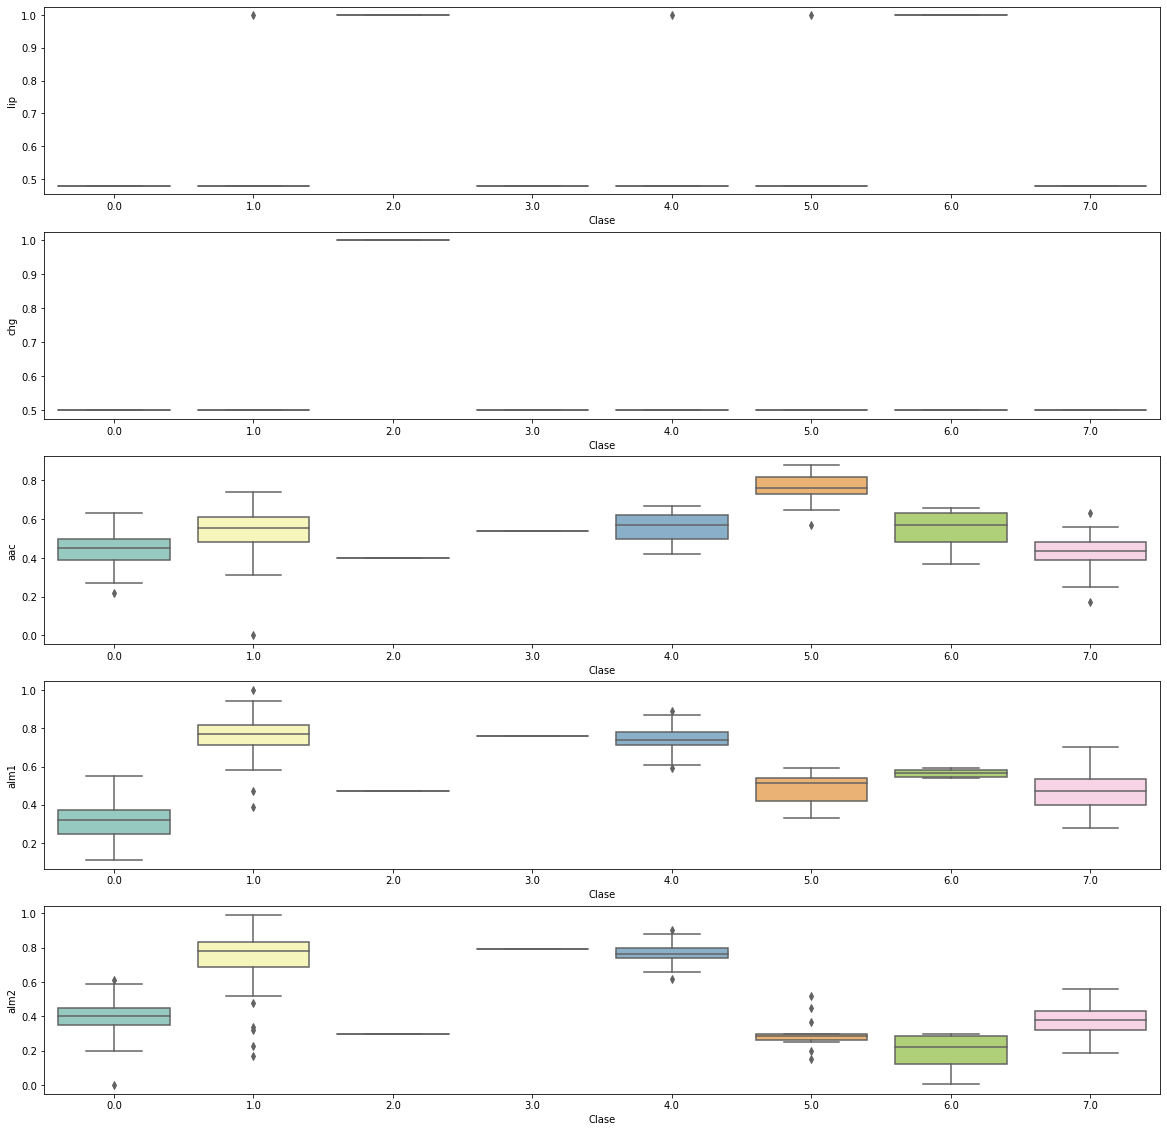

In [23]:
variables_restantes=list(data.columns[2:-1])
fig, axs = plt.subplots(nrows=len(variables_restantes),figsize=(20,20))
for i in range(len(variables_restantes)):
    sns.boxplot(y=variables_restantes[i], x='Clase' ,data=data,ax=axs[i],palette='Set3')    

Después de mostrar las distribuciones de cada variable respecto a la clase que pertenecen paso a analizar cada caso por separado. Empiezo con la variable **lip**, donde observo que hay tres clases (1, 4 y 5) en las que se observa la presencia de posibles *outliers*. Sin embargo, debo analizar si estos *outliers* realmente son peligrosos para el aprendizaje o si son casos especiales que deben permanecer dentro del conjunto, como en los casos anteriores. Para ello analizaré a fondo la variable **lip**, ya que no parece una variable con las mismas características que las demás.

count    235.000000
mean       0.497702
std        0.094497
min        0.480000
25%        0.480000
50%        0.480000
75%        0.480000
max        1.000000
Name: lip, dtype: float64


<AxesSubplot:>

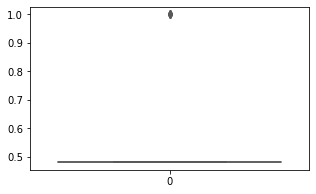

In [24]:
fig, axs = plt.subplots(figsize=(5,3))
print(data['lip'].describe())
sns.boxplot(data=data['lip'],palette='Set2')

Visualizo que en la variable **lip** generalmente todos los valores roman el valor 0.48 a excepción de las clases 2 y 6, que toman el valor 1. Esto es un claro indicio de que un valor de 1 en esta variable podría ser un rasgo de estas dos clases (algo a tener en cuenta en la [Selección de variables](#Selección-de-variables)). Sin embargo, como ya he comentado, hay algunos datos en las clases 1, 4 y 5 que también toman el valor 1 y esto podría ser un claro indicio de que son ruido. Observamos la cantidad de datos con valor uno y distinto de uno que hay en cada clase, y analizaré con la técnica del *IQR* la existencia de *outliers*.

In [25]:
k=3

In [26]:
print('Clase 1 valor distinto de 1: ',np.sum([(data['lip']!=1)&(data['Clase']==1)]))
print('Clase 1 valor igual a 1: ',np.sum([(data['lip']==1)&(data['Clase']==1)]))
outlierLip1=(data['lip']==1)&(data['Clase']==1)
outlier=deteccionOutilers_IQR(data['lip'][data['Clase']==1],k)
print('Numero de outliers detectados con la tecnica de IQR: ',outlier.sum())
print(np.sum(outlier&outlierLip1)==outlier.sum())

Clase 1 valor distinto de 1:  53
Clase 1 valor igual a 1:  1
Numero de outliers detectados con la tecnica de IQR:  1
True


In [27]:
print('Clase 4 valor distinto de 1: ',np.sum([(data['lip']!=1)&(data['Clase']==4)]))
print('Clase 4 valor igual a 1: ',np.sum([(data['lip']==1)&(data['Clase']==4)]))
outlierLip4=(data['lip']==1)&(data['Clase']==4)
outlier=deteccionOutilers_IQR(data['lip'][data['Clase']==4],k)
print(np.sum(outlier&outlierLip4)==outlier.sum())

Clase 4 valor distinto de 1:  24
Clase 4 valor igual a 1:  1
True


In [28]:
print('Clase 5 valor distinto de 1: ',np.sum([(data['lip']!=1)&(data['Clase']==5)]))
print('Clase 5 valor igual a 1: ',np.sum([(data['lip']==1)&(data['Clase']==5)]))
outlierLip5=(data['lip']==1)&(data['Clase']==5)
outlier=deteccionOutilers_IQR(data['lip'][data['Clase']==5],k)
print(np.sum(outlier&outlierLip5)==outlier.sum())

Clase 5 valor distinto de 1:  13
Clase 5 valor igual a 1:  1
True


Una vez muestro los casos de estas tres clases, en mi opinión estos datos está claro que son *outliers*. Por ello, los clasificaré como *outliers*, dado que si no alterarán el aprendizaje del clasificador claramente. Por lo tanto, aparto estos tres datos.

Continúo el análisis con la variable **chg** donde no observo ningún dato que pueda llegar a considerarse *outlier*.

A continuación, trato las variables **aac, alm1** y **alm2** donde observo que en algunas clases hay algunos candidatos a *outliers*.
Para ello identifico en que clases suceden estos casos por cada variable y busco los *outliers extremos*.

In [29]:
k=3

In [30]:
variables=['aac','alm1','alm2']
clases_peligro={'aac':[0,1,5,7],'alm1':[1,4],'alm2':[0,1,4,5]}
outliers=[]
for label in variables:
    print('\nVariable: ',label,'\n')
    for clase in clases_peligro[label]:
        #outliers
        print('Clase: ',clase)
        outlier=deteccionOutilers_IQR(data[label][data['Clase']==clase],k)
        print('Numero de outliers detectados con la tecnica de IQR: ',outlier.sum())
        print('Visualizamos caules son los outliers\n{}\n'.format(data[label][data['Clase']==clase][outlier]))
        
        if outlier.sum()!=0:
            outliers.append(outlier)


Variable:  aac 

Clase:  0
Numero de outliers detectados con la tecnica de IQR:  0
Visualizamos caules son los outliers
Series([], Name: aac, dtype: float64)

Clase:  1
Numero de outliers detectados con la tecnica de IQR:  1
Visualizamos caules son los outliers
200    0.0
Name: aac, dtype: float64

Clase:  5
Numero de outliers detectados con la tecnica de IQR:  0
Visualizamos caules son los outliers
Series([], Name: aac, dtype: float64)

Clase:  7
Numero de outliers detectados con la tecnica de IQR:  0
Visualizamos caules son los outliers
Series([], Name: aac, dtype: float64)


Variable:  alm1 

Clase:  1
Numero de outliers detectados con la tecnica de IQR:  0
Visualizamos caules son los outliers
Series([], Name: alm1, dtype: float64)

Clase:  4
Numero de outliers detectados con la tecnica de IQR:  0
Visualizamos caules son los outliers
Series([], Name: alm1, dtype: float64)


Variable:  alm2 

Clase:  0
Numero de outliers detectados con la tecnica de IQR:  1
Visualizamos caules son l

Observo que se detectan 7 *outliers extremos*, por lo que los selecciono para apartarlos del resto de instancias.
Finalmente, separo el dataset en dos conjuntos, uno con los *outliers* y otro sin ellos.

In [31]:
data_outliers=pd.concat([data[data['Clase']==7][outliersMGC],
data[data['Clase']==0][outliersGCH0],
data[outlierLip1],
data[outlierLip4],
data[outlierLip5],
data[data['Clase']==1][outliers[0]],
data[data['Clase']==0][outliers[1]],
data[data['Clase']==1][outliers[2]],
data[data['Clase']==5][outliers[3]]])
#print(data_outliers.shape[0])=12 numero total de outliers seleccionados (ya que hemos identificado un dato como outlier
#en dos ocasiones, el dato 174)
data_outliers=data_outliers.drop_duplicates()
#indices de los outliers a eliminar
print('Outliers: ',list(data_outliers.index))

Outliers:  [13, 109, 30, 47, 134, 174, 200, 226, 213, 224, 114, 234]


In [32]:
print('Nº instancias al inicio: ',data.shape[0])#numero de datos de data
data_sinOut=data.drop(list(data_outliers.index),axis=0)
print('Nº instancias sin outliers: ',data_sinOut.shape[0])#numero de datos sin los outliers (numero de datos de data-12)

Nº instancias al inicio:  235
Nº instancias sin outliers:  223


### Variable respuesta

A conitnuación, voy a analizar la variable respuesta donde me centraré en el número de ejemplos que hay por cada de clase para contemplar si estoy o no ante un problema no balanceado. Para ello, expongo la siguiente gráfica, la cual porporciona el número de datos que hay por cada clase.

C:\Users\unaig\anaconda3\envs\py38ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


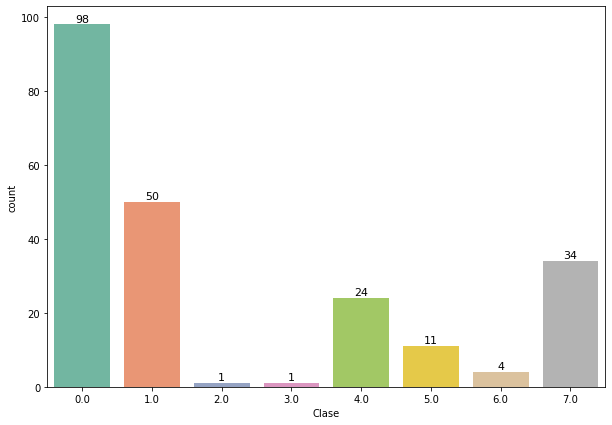

In [33]:
countplt, ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(data_sinOut.iloc[:,-1],palette='Set2');

# show count (+ annotate)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)

Se observa que claramente el problema no esta balanceado, debido a que hay una clase con una proporción de datos muy superior a la de los demas (como es el caso de la clase 0) y casos donde el numero de datos que tengo es muy reducido (como las clases 6 y 5) o clases como la 2 y la 3 donde **solo tengo un dato**.

Por ello, para solucionar este problema, en el apartado ["Generación de muestras"](#Generación-de-muestras) generaré muestras de entrenamiento y validación con distintas estrategias de preparación de datos.

## Análisis de correlaciones

Llegados a este punto, voy a hacer un análisis de correlación de las características y de la variable respuesta. Donde se observara que variables estan mas altamente relacionadas entre ellas (ya que algunas de ellas podrían ser redundantes) y de la correlación de las variables con la variable respuesta (de cara a saber que variables pueden aportar mayor información a la hora de clasificar los datos).

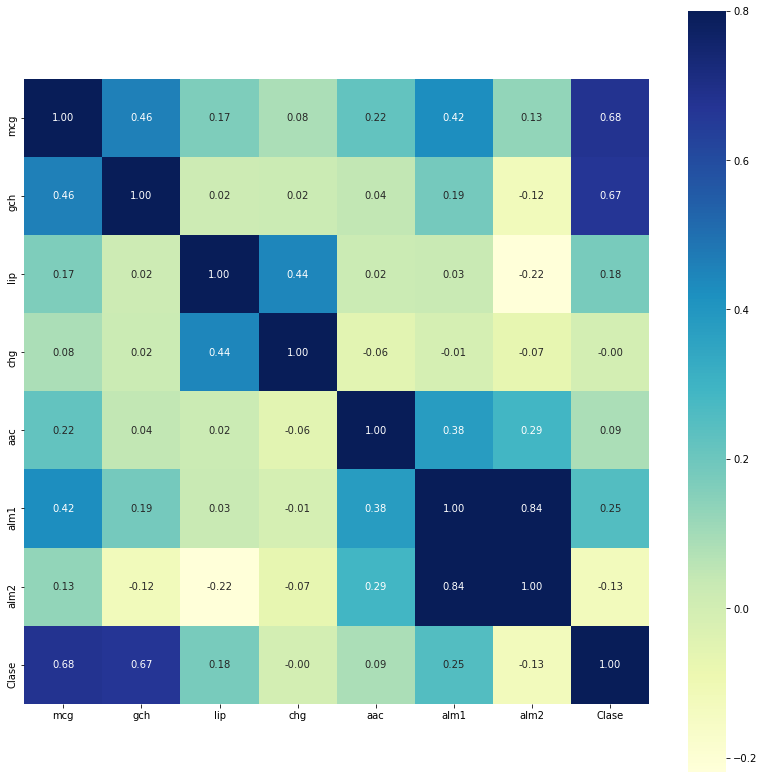

In [34]:
fig, axes = plt.subplots(figsize=(14,14))
sns.heatmap(data_sinOut.corr(), vmax=.8, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},cmap="YlGnBu");

Se observa una gran correlación positiva entre algunas variables, como entre **gch** y **mcg** (casualmente dos variables que aportan mucha información en la variable respuesta, siendo **mcg** la que mas aporta). También se observan una alta correlacion positiva entre las variables **alm1** y **alm2**, el valor de la correlación es tan alta que se podría llegar a pensar que una de las dos no es necesaria. Además, se observan algunas correlaciones positivas mas leves, como entre las variables **chg** y **lip** o **alm1** con **aac** y **mcg** (algo que deja entrever que la variable **mcg** es de gran importancia). 

Ahora, analizaré explicitamente las correlaciones de las variables explicativas con la variable respuesta, para informarme de que variables pueden llegar a aportar mas al modelo, para ello muestro la siguiente gráfica.

Minimo:  -0.12521746794397765  Maximo:  0.6778456874070123


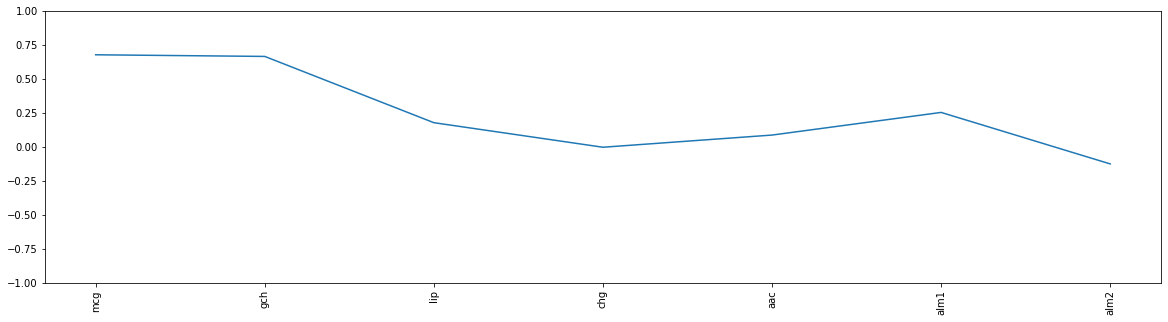

In [35]:
correlacionConClase =data_sinOut.corr().iloc[:-1,-1]
# Mostramos el valor de correlación mínimo y máximo
descripcion= correlacionConClase.describe()
minimo,maximo=descripcion.loc['min'],descripcion.loc['max']
print('Minimo: ',minimo,' Maximo: ',maximo)
# Mostramos una figura que muestre la correlación entre las variables de entrada y de salida
fig = plt.figure(figsize=(20,5))
ax = fig.gca()
ax.plot(range(correlacionConClase.shape[0]), correlacionConClase)
ax.set_xticks(range(correlacionConClase.shape[0]))
ax.set_xticklabels(data_sinOut.columns[:-1], rotation='90')
plt.ylim(-1,1)
plt.show()

Observo que las variables que mayor correlacion positiva ofrecen son las variables **mcg** y **gch** (estando las dos altamente correlacionadas entre ellas, por lo que probablemente una sea redundante). **Alm1** también tiene una correlación positiva con la variable respuesta, sin embargo, no ofrece un valor tan elevado como las anteriores variables.

Avanzando en el tema, ejecutaré técnicas de selección de variables para tomar las variables que mejor resultado puedan ofrecer. Haré uso de las siguientes técnicas: el **Filtro ANOVA** y el **Wrapper SBS**. No obstante para realizar este apartado de selección de variables es necesario obtener un conjunto de datos de entrenamiento y otro de validación, ya que tomaré las variables que mayor *accuracy* proporcionen con los datos de validación. Por ello, dejo este punto pendiente de realizar (apartado [Selección de variables](#Selección-de-variables)) y continúo con la [generación de muestras](#Generación-de-muestras).

## Generación de muestras

Llegados a este punto, voy a generar las muestras que utilizaré a lo largo del trabajo. Para ello, primero voy a exponer la estrategia que seguiré en este apartado. 

Por un lado generaré unos datos sinteticos, dado que el problema no esta balanceado como ya he tratado en el apartado sobre la [variable respuesta](#Variable-respuesta), y por eso es necesario balancear el conjunto de datos. Por lo tanto, crearé una muestra que tenga datos artificiales (sin excederse en la creación de estos) y datos reales. Una vez he generado esa muestra, formaré tres subconjuntos de datos, uno de entrenamiento, uno de validación y otro de testeo (a cada subconjunto le corresponde el 60, 20 y 20% de la muestra generada).

Finalmente, para ver la calidad y consistencia de los modelos, crearé tres muestras mas. Por un lado, tendré la muestra correspondiente a los *outliers*, donde podré analizar si el modelo puede llegar a tratar con estos (como ya he comentado antes, los resultados obtenidos con estos datos no tendrá gran relevancia). Por otro lado, tendré una muestra con todos los datos reales (sin los *outliers*), donde las mediciones obtenidas no serán tan relevantes debido a que estas serán **optimistas**, ya que el modelo habrá sido entrenado y validado con varios de estos datos. Por último, generaré otra muestra con datos sinteticos (pero cambiando la semilla de aleatoriedad) con los que analizaré la capacidad de generalización del módelo.  

A continuación, genero los conjuntos de datos expuestos.

**Conjunto de datos  reales**

In [36]:
data_reales=data_sinOut.to_numpy()
Xreales=data_reales[:,:-1]
yreales=data_reales[:,-1]

**Conjunto de *outliers***

*Como ya he comentado sera muy dificil obtener buenos resultados en este tipo de datos, ya que se tratan de outliers extremos. Sin embargo, pueden indicar que modelo puede llegar a proporcionar una mayor robustez ante instancias con valores erroneos en algunas características.*

In [37]:
data_outliers=data_outliers.to_numpy()
Xoutliers=data_outliers[:,:-1]
youtliers=data_outliers[:,-1]

**Conjunto de entrenamiento y de validación**

Para generar los datos sinteticos necesarios de la muestra principal, utilizaré la técnica *SMOTE*. Luego para tomar los datos mas relevantes de las clases mayoritarias y no tener datos sintetícos dentro de los clusters de las clases que no les corresponde haré uso de la técnica *Tomek Links*.

Comentar que se podrían tratar varias técnicas diferentes de preparación de datos y observar cual ofrece un mejor resultado; sin embargo, no profundizaré mas en este tema ya que el trabajo consiste en la generación de un modelo de clasificación y no de aplicar técnicas de preparación de datos. Además, considero que esta técnica es bastante eficiente y coherente.

Ahora, si se intenta aplicar la técnica *SMOTE* sobre el conjunto de datos reales me tropiezo con un nuevo obstáculo, **el conjunto de datos tiene clases que no llegan a tener 6 datos, es decir, el número de vecinos necesario para  aplicar *SMOTE***. Podría reducir el número de vecinos necesarios para aplicar esta técnica (haciendo uso primero de *SMOTE* y luego de *Tomek Links*, ya que en la función *SMOTETomek* no se puede alterar el número de vecinos necesarios), sin embargo, esto no solucionaría el problema, debido a que hay clases (*las clases 2 y 3*) donde solo hay una instancia y por lo tanto estas no tienen ningún vecino.

En consecuencia, se debe modificar la estrategia para resolver el inconveniente del desbalanceo. Por ello comenzaré utilizando la técnica *ROS* (*RandomOverSampler*) en las clases que tengan menos de 7 instancias, ya que para hacer uso de esta técnica no es necesario tener un minínimo de vecinos. Una vez aplicada, esta técnica aplicaré *SMOTETomek* en el conjunto de datos generados. Para hacer este segundo paso, como tengo que tener en cuenta todas las clases, aplicaré *SMOTETomek* en todo el conjunto pero luego eliminaré una gran cantidad de instancias de las clases que han sido expuestas a la técnica *ROS* para evitar el sobre-aprendizaje.

In [38]:
import imblearn.over_sampling as os
import imblearn.combine as hib
#tomamos las clases en las que tenemos menos de 7 datos (1 instancia y sus 6 vecinos)
clases=[0,1,2,3,4,5,6,7]
minimas={}

for label in clases:
    num=list(yreales).count(label)
    if num<7:
        minimas[label]=round(num*18/(num+1))#aumentamos levementela cantida de datos, lo suficiente para aplicar luego SMOTEENN
        #ya que en ese proceso el numero de instancia también aumentara

ros=os.RandomOverSampler(random_state=42,sampling_strategy=minimas)
smoteTomek=hib.SMOTETomek(random_state=42)

#comenzamos con la generación de los vecinos minimos
X_sampled, y_sampled =ros.fit_resample(Xreales,yreales)

#continuamos aplicando SMOTE y ENN, solo en los datos que no pertenecen a las clases anteriores
X_sampled, y_sampled =smoteTomek.fit_resample(X_sampled,y_sampled)

A continuación, muestro el conjunto de datos actual y como esta balanceado.

C:\Users\unaig\anaconda3\envs\py38ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


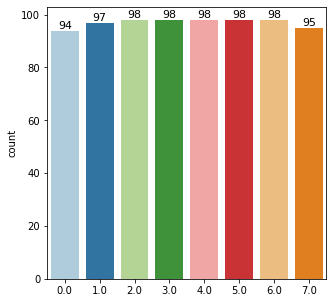

In [39]:
countplt, ax = plt.subplots(figsize = (5,5))
ax =sns.countplot(y_sampled,palette='Paired');

# show count (+ annotate)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)

Ahora eliminaré varias de las instancias de la clase 2, 3 y 6. Estas instancia que elimino, son la misma instancia repetida todo el rato, dado que, a la hora de hacer *SMOTE* con las clases 2 y 3, solo he repetido el mismo dato y esto puede llevar a que el modelo sobre-aprenda estas instancias (solo clasificará estas clases cuando las instancias tengan los mismos valores). Es cierto, que se desbalanceará un poco el conjunto, pero considero que es necesario para no caer en el sobre-aprendizaje.

In [40]:
#reducción de instancias en las clases que han sufrido ROS
for label in minimas.keys():
    #obtenemos las instancias que se han replicado
    Xreplicate=Xreales[yreales==label]
    indices=[]
    #obtenemos donde aparecen en el conjunto de datos generado
    for dato in Xreplicate:
        indices=np.where((X_sampled==dato).all(axis=1))[0]
        #una vez tenemos los indices si el número de replicaciones es superior a 50 tomaremos un 37.5% de los datos, con 
        #repeticiones entre 50 y 10, el 50% de los datos.
        if len(indices)>50:
            eliminar=indices[:round(len(indices)//1.5)]
            X_sampled=np.delete(X_sampled,eliminar,axis=0)
            y_sampled=np.delete(y_sampled,eliminar,axis=0)
        elif len(indices)>10:            
            eliminar=indices[:round(len(indices)//2)]
            X_sampled=np.delete(X_sampled,eliminar,axis=0)
            y_sampled=np.delete(y_sampled,eliminar,axis=0)

Una vez he aplicado la estrategia en su totalidad, muestro la cantidad de datos y el número de instancias por clase que tengo actualmente.

In [41]:
print('Numero de instancias iniciales: ',Xreales.shape[0])
print('Numero de instancias actuales: ',X_sampled.shape[0])

Numero de instancias iniciales:  223
Numero de instancias actuales:  620


C:\Users\unaig\anaconda3\envs\py38ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


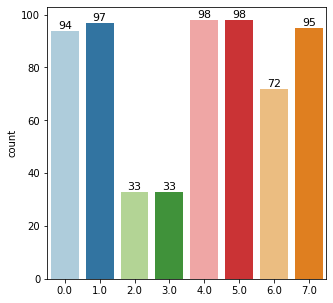

In [42]:
countplt, ax = plt.subplots(figsize = (5,5))
ax =sns.countplot(y_sampled,palette='Paired');

# show count (+ annotate)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)

Observo que ya he balanceado bastante nuestro conjunto de datos, donde he generado suficientes instancias de cada clase y he eliminado instancias consideradas ruido con *Tomek Links*. Por lo tanto, puedo proceder a crear los conjuntos de entrenamiento, validación y testeo.

Hay que tener en cuenta que en las clases en las que he aplicado la técnica *ROS* lo único que he hecho es replicar los datos que ya tenía, por lo que a la hora de validar tendré unos resultados un tanto optimistas, dada la existencia de estos datos en el conjunto de entrenamiento, pero creo que es el procedimiento mas eficiente que puedo llevar a cabo.

In [43]:
from sklearn import model_selection

X_train, X, y_train, y =model_selection.train_test_split(X_sampled,y_sampled,
                                                        train_size=0.6, random_state=42)

X_val, X_test, y_val, y_test =model_selection.train_test_split(X,y,
                                                        train_size=0.5, random_state=42)

Expongo el número de instancias de cada muestra y el número de instancias por clase.

Número de instancias de entrenamiento:  372
Número de instancias de validación:  124
Número de instancias de test:  124


C:\Users\unaig\anaconda3\envs\py38ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\unaig\anaconda3\envs\py38ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\unaig\anaconda3\envs\py38ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

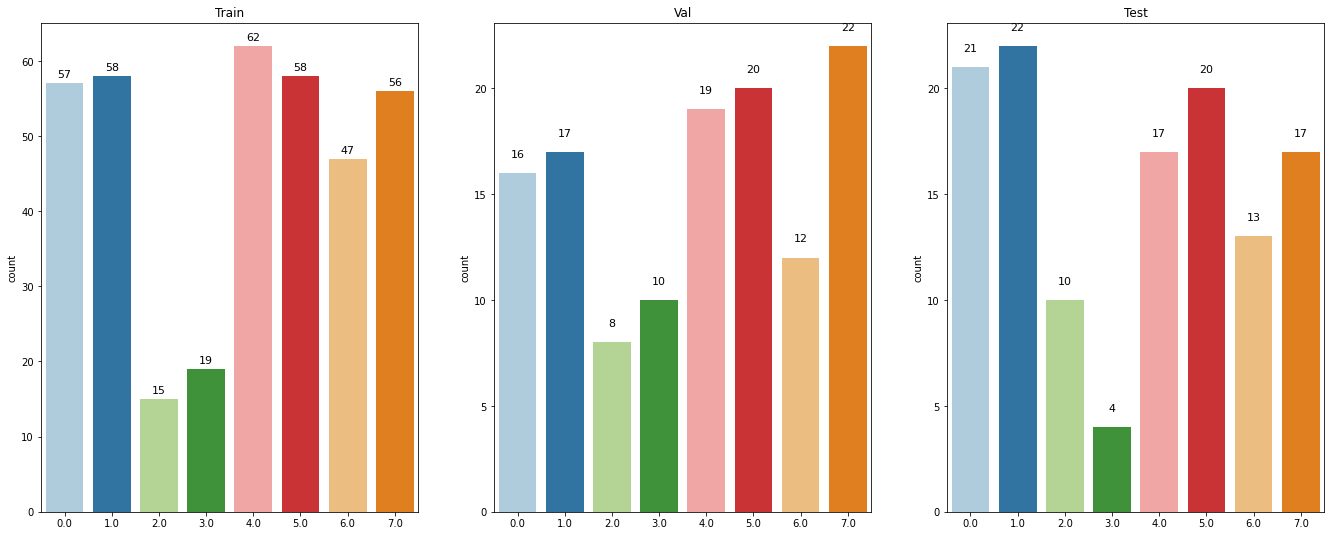

In [44]:
print('Número de instancias de entrenamiento: ',X_train.shape[0])
print('Número de instancias de validación: ',X_val.shape[0])
print('Número de instancias de test: ',X_test.shape[0])

countplt, axes = plt.subplots(figsize = (23,9),ncols=3)

sns.countplot(y_train,ax=axes[0],palette='Paired');
axes[0].set_title('Train')
for rect in axes[0].patches:
    axes[0].text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)

axes[1].set_title('Val')   
sns.countplot(y_val,ax=axes[1],palette='Paired');
for rect in axes[1].patches:
    axes[1].text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11) 
    
axes[2].set_title('Test')   
sns.countplot(y_test,ax=axes[2],palette='Paired');
for rect in axes[2].patches:
    axes[2].text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)    

Se observa que en general las tres muestras estan balanceadas, a excepción de las clases 2 y 3 por la reducción que he realizado.

**Conjunto de datos sinteticos**

A continuación, de cara a saber si el modelo generaliza correctamente los datos, genero una muestra de instancias artificiales con *ROS* y *SMOTE*. Los resultados obtenidos a raíz de esta muestra no verificaran una solución óptima pero pueden llegar a dar un indicio de la capacidad de generalización del modelo. Para no obtener los mismos datos que los generados antes, alteraré el valor semilla de aleatoriedad. Además, eliminaré los datos de la muestra generada anteriormente para evitar que los resultados sean optimistas.

In [45]:
ros=os.RandomOverSampler(random_state=123456,sampling_strategy=minimas)
smote=os.SMOTE(random_state=123456)

#comenzamos con la generación de los vecinos minimos
X_artificial, y_artificial =ros.fit_resample(Xreales,yreales)

#continuamos aplicando SMOTE y ENN, solo en los datos que no pertenecen a las clases anteriores
X_artificial, y_artificial =smote.fit_resample(X_artificial,y_artificial)

#eliminamos los datos del conjunto de datos reales para que los resultados en este apartado no sean tan optimistas
data_artificial=pd.DataFrame(np.hstack((X_artificial, y_artificial.reshape(-1,1))),columns=data_sinOut.columns)
data_filtro=pd.DataFrame(np.hstack((X_sampled,y_sampled.reshape(-1,1))),columns=data_sinOut.columns)


a_index=data_artificial.set_index(list(data_sinOut.columns)).index
b_index=data_filtro.set_index(list(data_sinOut.columns)).index
mask=~a_index.isin(b_index)
result=data_artificial.loc[mask].to_numpy()

X_artificial, y_artificial=result[:,:-1], result[:,-1]

He de comentar, que aunque considero bastante útil los resultados obtenidos con esta muestra, pueden no ser realmente relevantes, ya que puede darse el caso de que se creen datos irreales.

## Selección de variables

Una vez he obtenido los datos de entrenamiento y de validación, ya puedo continuar con la generación de modelos y su entrenamiento. Sin embargo, como trate en el apartado de [análisis de correlaciones](#Análisis-de-correlaciones), es interesante pensar que puedo llegar a obtener un mejor resultado en los modelos si solo se hace uso de algunas características. Estas variables las utilizaré para generar modelos mas simples, en los que analizaré si se obtiene una mejora de los resultados, ya que muchas veces un modelo mas simple puede ayudar a no tener variables redundantes que confundan el aprendizaje del algoritmo.

Para ello como trate en aquel apartado, haré uso de dos técnicas: el **Filtro ANOVA** y el **Wrapper SBS**. A la hora de establecer un limite de variables a incluir en el modelo, considero que podría ser interesante tomar 4 variables. A continuación, ejecuto las dos técnicas y tomaré la que mejor *accuracy* proporcione con la muestra de validación.

In [46]:
from imblearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn import feature_selection
from sklearn import linear_model
from sklearn import neighbors, metrics

sbs = feature_selection.RFE(linear_model.LogisticRegression(solver='lbfgs'), n_features_to_select=4, step=1)
anova = feature_selection.SelectKBest(feature_selection.f_classif, k=4)

listaMetodosSV = ['Wrapper SBS', 'Filtro Anova']
listaTecnicasSV = [sbs,anova]

for nombre, metodo in zip(listaMetodosSV, listaTecnicasSV):
    pipe = Pipeline([(nombre,metodo),('clasificadorKNN', neighbors.KNeighborsClassifier(n_neighbors=5))])
    pipe = pipe.fit(X_train,y_train)
    print('\nMétodo: ',nombre)
    prediccionesTrain = pipe.predict(X_train)
    accTrain = metrics.accuracy_score(prediccionesTrain,y_train)*100
    print('Resultado en entrenamiento: {}%'.format(accTrain))
    
    prediccionesTest = pipe.predict(X_val)
    accVal = metrics.accuracy_score(prediccionesTest,y_val)*100
    print('Resultado en validación: {}%'.format(accVal))
    
    print(list(data.columns[:-1][metodo.get_support()]))


Método:  Wrapper SBS
Resultado en entrenamiento: 95.6989247311828%
Resultado en validación: 90.32258064516128%
['mcg', 'lip', 'aac', 'alm2']

Método:  Filtro Anova
Resultado en entrenamiento: 88.17204301075269%
Resultado en validación: 89.51612903225806%
['chg', 'aac', 'alm1', 'alm2']


C:\Users\unaig\anaconda3\envs\py38ml\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


Observo que hay dos variables que aportan gran información a la hora de hacer la clasificación según las técnicas utilizadas, las variables **mcg** y **alm2**. Luego, aparece la variable **chg** en la técnica *ANOVA* y **lip** en la técnica *SBS*, las cuales tal y como observe en la matriz de correlaciones, estan bastante correlacionadas positivamente. Caso similar el que sucede con las variables **aac** y **alm1**.

Finalmente, se opta por seleccionar las siguientes variables: **mcg**, **lip**,**aac** y **alm2**, ya que es con las que obtengo un mayor resultado en el conjunto de validación entre las dos técnicas.

## Modelos de clasificación

A continuación, llego finalmente al objetivo principal, la creación de modelos de aprendizaje para poder hacer la clasificación de los datos.

Antes de empezar con la creación, expondré brevemente el procedimiento que voy a seguir. He tomado varias técnicas de aprendizaje automatico y con cada una de ellas seguire un protocolo similar.

<font color='salmon'><h3> Protocolo</h3></font>

<font color='rosybrown'>
    
Comienzo entrenando el modelo con los datos de entrenamiento. Luego, decidiré los hiperparémetros optimos según los resultados obtenidos con el conjunto de validación (al mismo tiempo que selecciono con cuantas variables se obtiene mejor resultado). Finalmente, observaré que resultados obtengo con el resto de muestras que he preparado en el apartado [generación de muestras](#Generación-de-muestras)
    ; aunque a la hora de comparar entre distintos modelos, me centraré en los resultados obtenido en test principalmente.

Los resultados que analizaré con cada muestra seran el *accuracy* y el *f score* porporcionado por el modelo para cada conjunto propuesto, siendo el *accuracy* de  los datos validados el que determine principalmente la calidad de este.

Luego porporcionaré el *f score* de cada clase de los datos obtenidos en test (mostrando además la matriz confusión proporcionada por el modelo) y varios *f score* generales calculados (me centraré en el *f score* proporcionado por *macro* correspondiente a la media no ponderada del *f score* de cada etiqueta). Además, mostrare el *accuracy* obtenido con cada muestra. Una vez he obtenido el modelo validado, analizaré los resultados de los datos de test, dado que estos no seran optimistas (por ello solo proporcionaré la salida de los *f score* de test, ya que son los que mas interesan).

Para obtener el mejor resultado posible crearé varios modelos con distintos hiperparámetros. En algun caso se podría probar también a añadir variables polinomiales, por si estas ofrecen una mejora en el resultado. Recuerdo, que a la hora de usar distintos grados de polinomio, habra que normalizar los datos, ya que se pueden tener variables con mayor peso en el modelo solo por tener un rango de distribución mayor. Sin embargo, considero que ya hay suficientes variables en el problema y no creo que sea muy interesante añadir mas, al contrario, creo que sería mas interesante tomar menos variables como he tratado en la [selección de variables](#Selección-de-variables),para poder reducir el coste computacional y eliminar posibles características redundantes. Por ello no haré uso de esa estrategia en este trabajo.

Además, para cada modelo, repetiré el proceso de selección de hiperparámetros tomando solo las cuatro variables seleccionadas en la [selección de variables](#Selección-de-variables), de modo que en cada tipo de clasificador tomaré el modelo que mejor *accuracy* proporcione según sus hiperparámetros y las variables que utilize.
</font>

Avanzo y muestro las distintas técnicas que voy a tratar.

- [Naive Bayes](#Naive-Bayes)
- [Redes nueronales](#Redes-nueronales)
- [Aprendizaje no supervisado](#Aprendizaje-no-supervisado)
- [Ensembles basados en variación de datos](Ensembles-basados-en-variación-de-datos)
- [Ensembles basados en descomposición](#Ensembles-basados-en-descomposición)

Antes de comenzar a generar modelos, voy a cargar todos los módulos necesarios para el uso de estos y generare el filtro necesario para evaluar con todas las variables o solo con las 4 seleccionadas.

In [47]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn import naive_bayes
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.linear_model import LogisticRegression

#indices de  mcg, lip ,aac y alm2.
indices=[0,2,4,6]
todos=np.ones(X_train.shape[1], dtype=bool)
filtro=[indices,todos]
tipo=['Modelo con las cuatro variables seleccionadas','Modelo con todas las variables']

#modelos seleccionados
best_selection={}

Además, genero una función **resultados**, que utilizaré con el modelo final de cada técnica para visualizar los resultado que he obtenido con todas las muestras, tal y como he expuesto en el protocolo.

In [48]:
def resultados(modelo,best_params,boolean=True):
    
    modelo.fit(X_train[:,best_params['Var']],y_train)
    
    pTrain=modelo.predict(X_train[:,best_params['Var']])
    accTrain=metrics.accuracy_score(pTrain,y_train)
    
    pVal=modelo.predict(X_val[:,best_params['Var']])
    accVal=metrics.accuracy_score(pVal,y_val)
        
    pTest=modelo.predict(X_test[:,best_params['Var']])
    accTest=metrics.accuracy_score(pTest,y_test)
    
    pOutliers=modelo.predict(Xoutliers[:,best_params['Var']])
    accOutliers=metrics.accuracy_score(pOutliers,youtliers)
    
    pReales=modelo.predict(Xreales[:,best_params['Var']])
    accReales=metrics.accuracy_score(pReales,yreales)
    
    pArt=modelo.predict(X_artificial[:,best_params['Var']])
    accArtificiales=metrics.accuracy_score(pArt, y_artificial)

    emaitzakAcc={'Info':'Accuracy','Train':[accTrain],'Val':[accVal],'Test':[accTest],
                      'Outliers':[accOutliers],'Reales':[accReales],'Artificiales':[accArtificiales]}

    print('\033[4m'+'\033[1m'+best_params['Tipo'])
    text=''
    for label in best_params.keys():
        if (label!='Tipo')and(label!='Var'):
            text+=label+'= '+str(best_params[label])+'\n'
    print(text+'\033[0m')
        
    emaitzak=pd.DataFrame(data=emaitzakAcc)
    print(emaitzak)
    
    try:
        if boolean:
            fig = plot_confusion_matrix(modelo, X_test[:,best_params['Var']], y_test,display_labels=modelo.classes_)
            fig.figure_.suptitle("Matriz de confusión de test")
            plt.show()
    except:
        print("Este modelo no proporciona la matriz de confusión")
    if boolean:    
        print(classification_report(y_test, pTest))

Llegados a este punto, comienzo realizando el protocolo expuesto con todas las técnicas. Comentar que todas las técnicas serán tratadas gracias a los modulos proporcionados por *Scikit-learn*.

### Naive Bayes

En este apartado voy a llevar a cabo la técnica *Naive Bayes*. En teoría vimos que esta técnica ofrece buenos resultados dado que podemos entrenar y clasificar de una manera rapida. Sin embargo, se que este método presupone que hay independencia entre los atributos del modelo, por lo que esto puede conllevar algunos errores en la clasificación, ya que en el apartado [análisis de correlaciones](#Análisis-de-correlaciones) he observado que hay correlación entre varias variables del dataset.

A continuación, generaré un algoritmo en base a *Naive Bayes* en el que haré uso del suavizado de laplace (la técnica que tratamos en teoría a fondo, ya que el Naive Bayes multinomial no tiene coherencia en este problema) con las 4 variables seleccionadas y con todas las variables. 

In [49]:
best_accVal = 0
best_params = {'Tipo':None,'Var':None}

for i in range(2):    
    nb = naive_bayes.GaussianNB()
    nb.fit(X_train[:,filtro[i]],y_train)
    
    accVal=nb.score(X_val[:,filtro[i]],y_val)
    print('\n{}.\nAccuracy validación: {}.'.format(tipo[i],accVal))
    pVal=nb.predict(X_val[:,filtro[i]])
    
    if accVal > best_accVal:
            # Guardamos la mejor precisión encontrada y los parámetros usados
            best_accVal=accVal
            best_params['Tipo']=tipo[i]
            best_params['Var']=filtro[i]


Modelo con las cuatro variables seleccionadas.
Accuracy validación: 0.9112903225806451.

Modelo con todas las variables.
Accuracy validación: 0.9435483870967742.


Analizando los resultados, se puede decir que en los dos casos se logran unos muy buenos resultados de clasificación con  el conjunto de validación. Procediendo con nuestro criterio, tomaré la opción que mayor *accuracy* proporciona, en este caso el modelo generado con todas las variables. No obstante, el modelo con solo 4 variables también proporciona un gran *accuracy*, por lo que podría llegar a ser un gran modelo, debido a la buena calidad de las clasificaciones y de la reducción computacional que supone tener tres variables menos.

A continuación, analizaré las salidas del modelo seleccionado.

Modelo con todas las variables

       Info     Train       Val      Test  Outliers    Reales  Artificiales
0  Accuracy  0.954301  0.943548  0.935484  0.416667  0.901345      0.918495


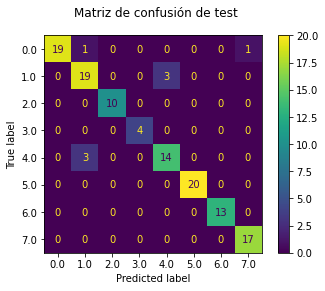

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        21
         1.0       0.83      0.86      0.84        22
         2.0       1.00      1.00      1.00        10
         3.0       1.00      1.00      1.00         4
         4.0       0.82      0.82      0.82        17
         5.0       1.00      1.00      1.00        20
         6.0       1.00      1.00      1.00        13
         7.0       0.94      1.00      0.97        17

    accuracy                           0.94       124
   macro avg       0.95      0.95      0.95       124
weighted avg       0.94      0.94      0.94       124



In [50]:
nb = naive_bayes.GaussianNB()
best_selection['Naive Bayes']=[nb,best_params]
resultados(nb,best_params)

**Conclusiones clasificador Naive Bayes**

Como ya he tratado se obtiene un gran *accuracy* con los datos de validación, y además los resultados obtenidos en test también son realmente buenos (estos resultados ya no son **optimistas**), por lo que se puede decir que es un buen clasificador. Es más, el modelo proporciona unos buenos resultados en el conjunto de datos artificiales y reales, aunque se sabe que los resultados de los datos reales son optimistas. Es cierto, que el *accuracy* del conjunto correspondiente a los *outliers* no es alto pero estoy clasificando correctamente un 40%, algo sorprendente para ser *outliers "extremos"* y no haber introducido este tipo de casos en el aprendizaje.

Finalmente, creo que se obtiene una buena generalización aunque preocupa la mala clasificación de algunos datos correspondientes a la clase 1 y 4, los cuales se llegan a confundir.

### Redes nueronales

A continuación, crearé modelos basados en redes nueronales haciendo uso de distintas estructuras. También, realizaré dos modelos por cada tipo de estructura que genero, uno con las 4 variables seleccionadas y otro con todas las variables (como ya trate en el *protocolo*).

Antes de proceder a la ejecución de los modelos, expongo las estructura que voy a utilizar:
- (75,75): Dos capas con 75 neuronas cada una.
- (150,100,50): Tres capas con 150,100 y 50 neuronas respectivamente.
- (50,75,100,75): Cuatro capas con 50,75,100 y 75 neuronas respectivamente.
- (25,25,25,25,25): Cinco capas todas con 25 neuronas.

Sabemos por teoría que en estos problemas de clasificación múltiple, la ultima capa debe tener tantas neuronas como posibles salidas hay; sin embargo, no es necesario establecer la ultima capa de las estructura con las 8 neuronas de salida ya que *Scikit Learn* lo hace automaticamente. También, comentar que la función de activación que utilizaré con todas las redes es la función **relu**.

In [51]:
estructuras=[(75,75),(150,100,50),(50,75,100,75),(25,25,25,25,25)]

best_accVal = 0
best_params = {'Estructura': None,'Tipo':None,'Var':None}

for i in range(2):
    for estruc in estructuras:
        red=MLPClassifier(alpha=1.0, max_iter=1000,random_state=42,hidden_layer_sizes =estruc)
        red.fit(X_train[:,filtro[i]],y_train)

        accVal=red.score(X_val[:,filtro[i]],y_val)
        print('\n{} y estructura {}.\nAccuracy validación: {}.'.format(tipo[i],estruc,accVal))
        
        if accVal > best_accVal:
            # Guardamos la mejor precisión encontrada y los parámetros usados
            best_accVal=accVal
            best_params['Estructura']=estruc
            best_params['Tipo']=tipo[i]
            best_params['Var']=filtro[i]


Modelo con las cuatro variables seleccionadas y estructura (75, 75).
Accuracy validación: 0.782258064516129.

Modelo con las cuatro variables seleccionadas y estructura (150, 100, 50).
Accuracy validación: 0.8629032258064516.

Modelo con las cuatro variables seleccionadas y estructura (50, 75, 100, 75).
Accuracy validación: 0.8951612903225806.

Modelo con las cuatro variables seleccionadas y estructura (25, 25, 25, 25, 25).
Accuracy validación: 0.8951612903225806.

Modelo con todas las variables y estructura (75, 75).
Accuracy validación: 0.8225806451612904.

Modelo con todas las variables y estructura (150, 100, 50).
Accuracy validación: 0.8467741935483871.

Modelo con todas las variables y estructura (50, 75, 100, 75).
Accuracy validación: 0.9032258064516129.

Modelo con todas las variables y estructura (25, 25, 25, 25, 25).
Accuracy validación: 0.9193548387096774.


Observo que el modelo que mejor resultado proporciona es el modelo que utiliza todas las variables y tiene la estructura de red  (25,25,25,25,25). También, encuentro otras buenas soluciones pero no proporcionan un *accuracy* tan elevado. Continúo con el análisis del modelo seleccionado.

Modelo con todas las variables
Estructura= (25, 25, 25, 25, 25)

       Info     Train       Val      Test  Outliers    Reales  Artificiales
0  Accuracy  0.965054  0.919355  0.927419       0.5  0.919283       0.92163


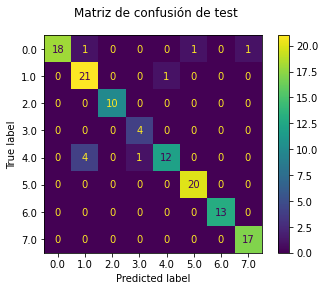

              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92        21
         1.0       0.81      0.95      0.88        22
         2.0       1.00      1.00      1.00        10
         3.0       0.80      1.00      0.89         4
         4.0       0.92      0.71      0.80        17
         5.0       0.95      1.00      0.98        20
         6.0       1.00      1.00      1.00        13
         7.0       0.94      1.00      0.97        17

    accuracy                           0.93       124
   macro avg       0.93      0.94      0.93       124
weighted avg       0.93      0.93      0.93       124



In [52]:
red=MLPClassifier(alpha=1.0, max_iter=1000,random_state=42,hidden_layer_sizes =best_params['Estructura'])
best_selection['Red Neuronal']=[red,best_params]
resultados(red,best_params)

**Conclusiones clasificador Redes neuronales**

Realmente se tiene un caso muy similar al anterior, donde obtengo unos muy buenos resultados en general. Sin embargo, vuelvo a incurrir en la confusión entre la clase 4 con la 1, y peor aún, observo que hay varios datos de la clase mayoritaria que se fallan. Es cierto, que se observa una mejora con los *outliers*, aunque este resultado no es tan relevante y priorizo la buena clasificación de los datos de test a estos. También, se observa una mejora con los datos reales y artificiales. En conseguiente, estoy ante un buen modelo pero considero que el proporcionado por *Naive Bayes* podría resultar mas útil.

### Aprendizaje no supervisado

A continuación, voy a tratar un algoritmo de aprendizaje no supervisado; es decir, a los datos de entrenamiento no les proporcionaré la salida conocida. Probablemente los resultados de este método sean pesimos ya que la técnica como tal no esta dirigida a este tipo de problema, pero veo interesante ver que resultados puedo llegar a obtener.

Comenzaré tratando la técnica de *Kmeans* y luego trataré también las técnicas de clustering jerarquico con distintas distancias (*Single Link*, *Average Link* y *Complete Link*).

Con *Kmeans* de *Scikit Learn* podemos hacer predicciones pero con las otras técnicas no, por lo tanto, con *Kmeans* seguiré el protocolo habitual y con las otras técnicas intentaré clasificar los datos reales juntos (en caso de querer clasificar nuevos datos habría que incluir esos datos en el conjunto a clasificar).

In [53]:
print('Kmeans')
best_params = {'Tipo':None,'Var':None}

for i in range(2):
    kmeans=KMeans(n_clusters=8,init='random', n_init=10, max_iter=10, random_state=42)
    kmeans.fit(X_train[:,filtro[i]])
    
    best_params['Tipo']=tipo[i]
    best_params['Var']=filtro[i]
    
    resultados(kmeans,best_params,False)
    print('\n')

Kmeans
Modelo con las cuatro variables seleccionadas

       Info     Train       Val      Test  Outliers    Reales  Artificiales
0  Accuracy  0.158602  0.080645  0.193548  0.166667  0.327354      0.053292


Modelo con todas las variables

       Info     Train       Val      Test  Outliers    Reales  Artificiales
0  Accuracy  0.362903  0.354839  0.395161  0.416667  0.533632      0.354232




In [54]:
single=AgglomerativeClustering(n_clusters=8,linkage="single")
single.fit(Xreales)
c=single.labels_
accSingle=metrics.accuracy_score(c,yreales)
fSingle=metrics.f1_score(c,yreales, average='macro')
print('Single Link.\nAccuracy: {}.\nF score: {}.\n'.format(accSingle,fSingle))
    
average=AgglomerativeClustering(n_clusters=8,linkage="average")
average.fit(Xreales)
c=average.labels_
accAverage=metrics.accuracy_score(c,yreales)
fAverage=metrics.f1_score(c,yreales, average='macro')
print('Average Link.\nAccuracy: {}.\nF score: {}.\n'.format(accAverage,fAverage)) 

    
complete=AgglomerativeClustering(n_clusters=8,linkage="complete")
complete.fit(Xreales)
c=complete.labels_
accComplete=metrics.accuracy_score(c,yreales)
fComplete=metrics.f1_score(c,yreales, average='macro')
print('Complete Link.\nAccuracy: {}.\nF score: {}.'.format(accComplete,fComplete))

Single Link.
Accuracy: 0.4439461883408072.
F score: 0.09935897435897437.

Average Link.
Accuracy: 0.013452914798206279.
F score: 0.007463094587206124.

Complete Link.
Accuracy: 0.47085201793721976.
F score: 0.24127813561973013.


**Conclusiones clasificadores con aprendizaje no supervisado**

Visualizo que todos los resultados obtenidos son de muy mala calidad, tal y como esperaba al comienzo del apartado. Por lo tanto, no analizaré ningún modelo explícitamente ya que no considero que sea de interes. Gracias a este apartado, he podido comprobar que los datos no estan agrupados por **clusters**, ya que estas técnicas solo son útiles en este tipo de agrupaciones de los datos.

### Ensembles basados en variación de datos

Continúo con el proceso de generación de modelos y ahora me basaré en los ensembles basados en variación de datos. Para ello, tomaré como clasificador base o un arbol de decisión con un nivel de profundidad (un *Decision Stump*) o un *Naive Bayes*. 

A continuación, expongo los algoritmos que utilizaré y luego procederé a ejecutar el protocolo sobre ellos.

- [Bagging](#Bagging)
- [Random Forest](#Random-Forest)
- [Boosting](#Boosting)

#### Bagging

Comienzo con el ensemble *Bagging*, donde generaré modelos con distinta cantidad de clasificadores básicos. Este algoritmo tiene la ventaja de que hay poco riesgo de sobre-aprendizaje, por lo que puede resultar interesante dado los datos que tengo (tengo clases como la 2 y la 3 donde he replicado el mismo dato, en consecuencia, el algoritmo podría sobre-aprender y solo clasificaría esas clases al tener un dato identico).

In [55]:
num_Clasificadores=[3,6]
#num_Clasificadores=[100]

best_accVal = 0
best_params = {'num_Clasificadores': None,'Tipo':None,'Var':None}

for i in range(2):
    for num in num_Clasificadores:
        bagging=BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=1)
                                  , n_estimators=num, random_state=42)
        
        bagging.fit(X_train[:,filtro[i]],y_train)
        
        accVal=bagging.score(X_val[:,filtro[i]],y_val)
        print('\n{} y {} clasificadores.\nAccuracy validación: {}.'.format(tipo[i],num,accVal))
        
        if accVal > best_accVal:
            # Guardamos la mejor precisión encontrada y los parámetros usados
            best_accVal=accVal
            best_params['num_Clasificadores']=num
            best_params['Tipo']=tipo[i]
            best_params['Var']=filtro[i]


Modelo con las cuatro variables seleccionadas y 3 clasificadores.
Accuracy validación: 0.33064516129032256.

Modelo con las cuatro variables seleccionadas y 6 clasificadores.
Accuracy validación: 0.31451612903225806.

Modelo con todas las variables y 3 clasificadores.
Accuracy validación: 0.33064516129032256.

Modelo con todas las variables y 6 clasificadores.
Accuracy validación: 0.31451612903225806.


Me encuentro con que los modelos generados proporcionan unos muy malos resultados. Esto sucede ya que en el bagging se estan generando las fronteras de clasificación en base a rectas (ya que se hace uso de *DecisionStump*) sin tener en cuenta el peso que debe tener cada recta y por ello el modelo no se ciñe correctamente a los datos. Además, el problema no se soluciona aumentando el número de clasificadores, dado que los clasificadores seguirán siendo rectas y el problema del voto no se solucionaría (dejo comentada una linea de código, al descomentarla se ejecutara el proceso con 100 clasificadores y se observa que el modelo sigue teniendo el mismo problema). Esto sucede porque el bagging esta preparado para clasificadores que sobre-aprendan y en este caso estoy haciendo uso de un clasificador que no sobre-aprende si no que además tiene bias altos.

Sin embargo, tomo como clasificador básico un clasificador *Naive Bayes*. Los clasificadores *Naive Bayes* se consideran clasificadores débiles, por lo tanto, pueden ser una buena opción para resolver este problema.

In [56]:
num_Clasificadores=[3,6]

best_accVal = 0
best_params = {'num_Clasificadores': None,'Tipo':None,'Var':None}

for i in range(2):
    for num in num_Clasificadores:        
        bagging=BaggingClassifier(naive_bayes.GaussianNB()
                                  , n_estimators=num, random_state=42)
        
        bagging.fit(X_train[:,filtro[i]],y_train)
        
        accVal=bagging.score(X_val[:,filtro[i]],y_val)
        print('\n{} y {} clasificadores.\nAccuracy validación: {}.'.format(tipo[i],num,accVal))
        
        if accVal > best_accVal:
            # Guardamos la mejor precisión encontrada y los parámetros usados
            best_accVal=accVal
            best_params['num_Clasificadores']=num
            best_params['Tipo']=tipo[i]
            best_params['Var']=filtro[i]


Modelo con las cuatro variables seleccionadas y 3 clasificadores.
Accuracy validación: 0.9354838709677419.

Modelo con las cuatro variables seleccionadas y 6 clasificadores.
Accuracy validación: 0.9112903225806451.

Modelo con todas las variables y 3 clasificadores.
Accuracy validación: 0.9435483870967742.

Modelo con todas las variables y 6 clasificadores.
Accuracy validación: 0.9354838709677419.


Observo que el resultado obtenido con todas las variables y con 3 clasificadores básicos proporciona un buen *accuracy* con los datos de validación. Por ello, expongo los resultados que porporciona este clasificador.

Modelo con todas las variables
num_Clasificadores= 3

       Info     Train       Val      Test  Outliers    Reales  Artificiales
0  Accuracy  0.951613  0.943548  0.927419       0.5  0.896861      0.915361


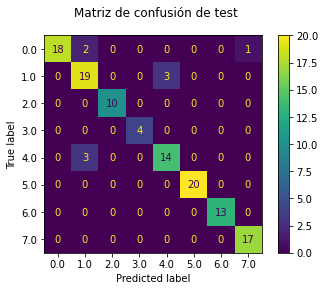

              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92        21
         1.0       0.79      0.86      0.83        22
         2.0       1.00      1.00      1.00        10
         3.0       1.00      1.00      1.00         4
         4.0       0.82      0.82      0.82        17
         5.0       1.00      1.00      1.00        20
         6.0       1.00      1.00      1.00        13
         7.0       0.94      1.00      0.97        17

    accuracy                           0.93       124
   macro avg       0.94      0.94      0.94       124
weighted avg       0.93      0.93      0.93       124



In [57]:
bagging=BaggingClassifier(naive_bayes.GaussianNB()
                        ,n_estimators=best_params['num_Clasificadores'], random_state=42)
best_selection['Bagging + Naive Bayes']=[bagging,best_params]
resultados(bagging,best_params)

**Conclusiones Bagging**

Aprecio unos muy buenos resultados con el conjunto de test (incluso supera a los de la red neuronal). No obstante, este modelo sigue confundiendo varios datos de la clase 4 y la clase 1. Concluyo que este modelo es bastante eficiente y además se tiene menos probabilidad de sobre-aprendizaje gracias a la estructura del *bagging*, algo a tener en cuenta por el tipo de dataset y la cantidad de datos que hay.

#### Random Forest

Los random forest son un tipo de ensemble en el que los clasificadores base son árboles de decisión. Voy a implementar esta técnica, dado que, aunque se pierda la posible interpretabilidad del modelo, ofrece un buen rendimiento y robusto de un modo simple. Tomaré cuatro valores posibles para el número de arboles de decisión que generaré (3, 9, 15 y 25) y aplicaré el protocolo con esta técnica.

In [58]:
num_Clasificadores=[3,9,15,25]

best_accVal = 0
best_params = {'num_Clasificadores': None,'Tipo':None,'Var':None}

for i in range(2):
    for num in num_Clasificadores:
        forest=RandomForestClassifier(criterion='entropy', max_features = 'log2'
                       , n_estimators=num, random_state=42)
        
        forest.fit(X_train[:,filtro[i]],y_train)
        
        accVal=forest.score(X_val[:,filtro[i]],y_val)
        print('\n{} y {} clasificadores.\nAccuracy validación: {}.'.format(tipo[i],num,accVal))
        
        if accVal > best_accVal:
            # Guardamos la mejor precisión encontrada y los parámetros usados
            best_accVal=accVal
            best_params['num_Clasificadores']=num
            best_params['Tipo']=tipo[i]
            best_params['Var']=filtro[i]


Modelo con las cuatro variables seleccionadas y 3 clasificadores.
Accuracy validación: 0.8790322580645161.

Modelo con las cuatro variables seleccionadas y 9 clasificadores.
Accuracy validación: 0.9112903225806451.

Modelo con las cuatro variables seleccionadas y 15 clasificadores.
Accuracy validación: 0.9193548387096774.

Modelo con las cuatro variables seleccionadas y 25 clasificadores.
Accuracy validación: 0.9193548387096774.

Modelo con todas las variables y 3 clasificadores.
Accuracy validación: 0.9435483870967742.

Modelo con todas las variables y 9 clasificadores.
Accuracy validación: 0.9435483870967742.

Modelo con todas las variables y 15 clasificadores.
Accuracy validación: 0.9516129032258065.

Modelo con todas las variables y 25 clasificadores.
Accuracy validación: 0.967741935483871.


El modelo con todas las variables y 25 arboles ofrece un *accuracy* sorprendentemente alto. Antes de pasar a analizar el mejor modelo seleccionado, cabe mencionar que se encuentran modelos con distintas características peores al modelo seleccionado que igualan e incluso mejoran los resultados obtenidos anteriormente con otros modelos.

Modelo con todas las variables
num_Clasificadores= 25

       Info  Train       Val      Test  Outliers    Reales  Artificiales
0  Accuracy    1.0  0.967742  0.951613  0.666667  0.959641      0.940439


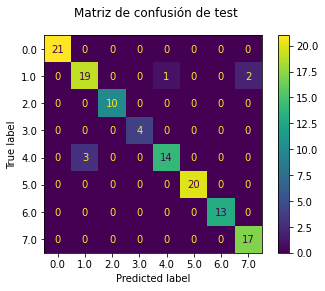

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        21
         1.0       0.86      0.86      0.86        22
         2.0       1.00      1.00      1.00        10
         3.0       1.00      1.00      1.00         4
         4.0       0.93      0.82      0.87        17
         5.0       1.00      1.00      1.00        20
         6.0       1.00      1.00      1.00        13
         7.0       0.89      1.00      0.94        17

    accuracy                           0.95       124
   macro avg       0.96      0.96      0.96       124
weighted avg       0.95      0.95      0.95       124



In [59]:
forest=RandomForestClassifier(criterion='entropy', max_features = 'log2'
                       , n_estimators=best_params['num_Clasificadores'], random_state=42)
best_selection['Random Forest']=[forest,best_params]
resultados(forest,best_params)

**Conclusiones Random Forest**

Percibo que se tienen unos resultados extraordinarios. Logro los mejores resultados con diferencia entre todos los modelos que he seleccionado hasta el moomento. Observando la clasificación de los datos en test, se fallan muy pocos datos. Es cierto que sigue habiendo confusion entre la clase 1 y la 4, pero el error es muy escaso. Además, obtengo el mejor resultado con los *outliers*, verificando así nuestro argumento principal de que estos métodos son robustos frente a este tipo de datos. Finalmente, con los datos reales y artificiales los resultados son de muy buena calidad (aunque los resultados no son del todo fiables). En consiguiente, estamos ante una alternativa muy eficiente.

#### Boosting

Para terminar con las técnicas de [ensembles basados en variación de datos](#Ensembles-basados-en-variación-de-datos) aplicaré el algoritmo *boosting*. Este algoritmo se considera uno de los mejores dada su fuerte base teórica y dado que reduce tanto el bias y la varianza.

Sin embargo, hay que tener cuidado con el ruido, ya que estas instancias recibiran mayor peso. No obstante, considero que no tendré grandes errores gracias a la separación de los outliers en el [análisis descriptivo](#Análisis-descriptivo). 

Por último, antes de aplicar el algoritmo, considero como clasificador débil un *Decision Stump*. Además, también tomaré un clasificador *Naive Bayes* (ya que también se considera un clasificador débil como ya he comentado en el [Bagging](#Bagging)). 

In [60]:
num_Clasificadores=[6,8]

best_accVal = 0
best_params = {'num_Clasificadores': None,'Tipo':None,'Var':None}

clasificadoresBase=[DecisionTreeClassifier(criterion='entropy',max_depth=1)
                   ,naive_bayes.GaussianNB()]
clasificadorNames=['Decision Stump','Naive Bayes']

for i in range(2):
    for num in num_Clasificadores:
        for cfbase in range(len(clasificadoresBase)):
            adaboost=AdaBoostClassifier(base_estimator=clasificadoresBase[cfbase]
                            ,n_estimators=num, random_state=42)

            adaboost.fit(X_train[:,filtro[i]],y_train)

            accVal=adaboost.score(X_val[:,filtro[i]],y_val)
            print('\n{} y {} clasificadores (tipo: {}).\nAccuracy validación: {}.'.format(tipo[i],
                                        num,clasificadorNames[cfbase],accVal))

            if accVal > best_accVal:
                # Guardamos la mejor precisión encontrada y los parámetros usados
                best_accVal=accVal
                best_params['num_Clasificadores']=num
                best_params['Tipo']=tipo[i]
                best_params['Var']=filtro[i]


Modelo con las cuatro variables seleccionadas y 6 clasificadores (tipo: Decision Stump).
Accuracy validación: 0.3870967741935484.

Modelo con las cuatro variables seleccionadas y 6 clasificadores (tipo: Naive Bayes).
Accuracy validación: 0.7661290322580645.

Modelo con las cuatro variables seleccionadas y 8 clasificadores (tipo: Decision Stump).
Accuracy validación: 0.3870967741935484.

Modelo con las cuatro variables seleccionadas y 8 clasificadores (tipo: Naive Bayes).
Accuracy validación: 0.8064516129032258.

Modelo con todas las variables y 6 clasificadores (tipo: Decision Stump).
Accuracy validación: 0.4274193548387097.

Modelo con todas las variables y 6 clasificadores (tipo: Naive Bayes).
Accuracy validación: 0.75.

Modelo con todas las variables y 8 clasificadores (tipo: Decision Stump).
Accuracy validación: 0.4274193548387097.

Modelo con todas las variables y 8 clasificadores (tipo: Naive Bayes).
Accuracy validación: 0.8145161290322581.


**Conclusiones Boosting**

Observo que, sorprendentemente, obtengo unos resultados muy pobres con todas las combinaciones propuestas, por lo que este método puede ser que no nos conduzca a una solución eficiente. Por lo tanto, no selecciono ninguno de estos modelos y no analizo sus resultados.

Los resultados obtenidos con Naive Bayes podrían llegar a ser interesantes si aumento el número de clasificadores; sin embargo, el coste computacionl crecería y no considero que sea interesante.

### Ensembles basados en descomposición

Llegados a este punto, voy a utilizar ensembles basados en descomposición con el objetivo de afrontar este problema multi-clase con clasificadores binarios. Para ello tomaré los siguientes clasificadores binarios: 

- [Support Vector Machines](#Support-Vector-Machines)
- [Regresión logística (sin regularización)](#Regresión-logística-(sin-regularización))

Ahora, aplicaré con cada clasificador binario las estrategias *OVO* (One-vs-One) y *OVA* (One-vs-All).

Por un lado, *OVO* es utilizado para problemas mas sencillos y pequeños; y por otro lado, *OVA* prporciona agregaciones mas simples y utiliza todos los ejemplos pero genera mas coste computacional y tiene broblemas con muestras no balanceadas (esto podría inducir a que los resultados no sean muy correctos, ya que la muestra de entrenamiento no esta del todo balanceada).

#### Support Vector Machines

Para ejecutar las técnicas *OVO* y *OVA*, se suele hacer uso de algunos modulos de *Scikit Learn*. Sin embargo, *Scikit Learn* integra directamente el clasificador en este caso, facilitando asi la programación de esta técnica.

Además, en este caso alteraré un poco el protocolo y probaré otra alternativa a este. Para obtener los mejores hiperparámetros del clasificador y la  mejor técnica para el clasificador *SVM* generaré una validación cruzada con los datos de entrenamiento, tomando así los mejores condiciones. Luego, con el conjunto de validación escogeré con que número de variables se obtiene mejor resultado. Y finalmente, analizaré los resultados obtenidos en test.

Los valores de los hiperparámetros que tomo serán (0.1, 0.3, 1, 3, 10) en los dos casos, para intentar evitar problemas de bias y varianzas altas o bajas (no se toman ni valores muy pequeños ni valores muy elevados).

Por último, antes de proceder a generar los modelos, comentar que haré uso del *kernel Gaussiano*, dado que no tengo un gran número de instancias de entrenamiento ni un número elevado de características.

In [61]:
#decision_function_shape=ovo,ovr
C_values = [ 0.1, 0.3, 1, 3, 10]
gamma_values = [ 0.1, 0.3, 1, 3, 10]
tecnicas=['ovo','ovr']

best_accVal = 0
best_params = {'C': None, 'gamma': None,'Tipo':None,'Var':None,'Técnica':None}
param_grid= {'C': C_values, 'gamma': gamma_values,'decision_function_shape':tecnicas}

for i in range(2):
    clasificadores = GridSearchCV(, param_grid,cv=10)
    clasificadores.fit(X_train[:,filtro[i]],y_train)
    
    params_=clasificadores.best_params_
    
    svc=svm.SVC(C=params_['C'],gamma=params_['gamma']
                ,decision_function_shape=params_['decision_function_shape'],random_state=42)
    
    svc.fit(X_train[:,filtro[i]],y_train)  
    
    accVal=svc.score(X_val[:,filtro[i]],y_val)
    print('\n{}. C: {}, Gamma: {}, Técnica: {}.\nAccuracy validación: {}.'.format(tipo[i]
        ,params_['C'],params_['gamma'],params_['decision_function_shape'],accVal))
            
    if accVal > best_accVal:
        best_accVal=accVal
        best_params['C']=params_['C']
        best_params['gamma']=params_['gamma']
        best_params['Técnica']=params_['decision_function_shape']
        best_params['Tipo']=tipo[i]
        best_params['Var']=filtro[i]


Modelo con las cuatro variables seleccionadas. C: 10, Gamma: 10, Técnica: ovo.
Accuracy validación: 0.8870967741935484.

Modelo con todas las variables. C: 10, Gamma: 10, Técnica: ovo.
Accuracy validación: 0.9516129032258065.


Modelo con todas las variables
C= 10
gamma= 10
Técnica= ovo

       Info     Train       Val      Test  Outliers   Reales  Artificiales
0  Accuracy  0.986559  0.951613  0.967742  0.583333  0.93722      0.937304


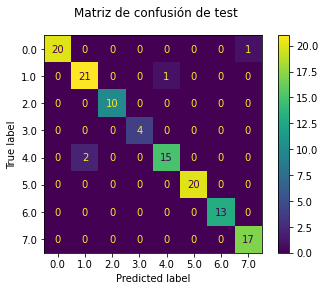

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98        21
         1.0       0.91      0.95      0.93        22
         2.0       1.00      1.00      1.00        10
         3.0       1.00      1.00      1.00         4
         4.0       0.94      0.88      0.91        17
         5.0       1.00      1.00      1.00        20
         6.0       1.00      1.00      1.00        13
         7.0       0.94      1.00      0.97        17

    accuracy                           0.97       124
   macro avg       0.97      0.97      0.97       124
weighted avg       0.97      0.97      0.97       124



In [62]:
svc=svm.SVC(C=best_params['C'],gamma = best_params['gamma'],decision_function_shape=best_params['Técnica'],random_state=42)
best_selection['SVC']=[svc,best_params]
resultados(svc,best_params)

**Conclusiones SVM**

Observo que logro una gran precisión en todos los conjuntos posibles, a excepción del conjunto de los *outliers* (no obstante el clasificador es capaz de clasificar correctamente mas de la mitad de los *outliers* mostrando así la robustez del modelo frente a este tipo de instancias). Además, distingue bastante bien las clases 1 y 4, algo que otros clasificadores no lograban. Este clasificador puede ser muy interesante ya que tiene resultados muy parecidos a los obtenidos con 
[Random Forest](#Random-Forest), clasificador que se ha concluido que tenía gran eficacia.

#### Regresión logística (sin regularización)

En este caso para ejecutar las técnicas *OVO* y *OVA* las tendré que hacer con ayuda de modulos de *Scikit Learn*. Por ello, ejecutaré el protocolo dos veces, una vez con *OVO* y otra con *OVA*.

Por último, antes de proceder a generar los modelos, comentar que no se hace uso de la regularización, ya que se deben considerar clasificadores débiles que cometan una cantidad de errores para lograr diversidad y mejorar al clasificador final.

**OVA**

In [63]:
best_accVal = 0
best_params = {'Tipo':None,'Var':None}

for i in range(2):
    OVA=OneVsRestClassifier(estimator=LogisticRegression(penalty='l2',max_iter=400,
                                                         solver='newton-cg',C=10.e50,random_state=42))
    OVA.fit(X_train[:,filtro[i]],y_train)
    
    accVal=OVA.score(X_val[:,filtro[i]],y_val)
    print('{}.\nAccuracy validación: {}.\n'.format(tipo[i],accVal))
            
    if accVal > best_accVal:
        best_accVal=accVal
        best_params['Tipo']=tipo[i]
        best_params['Var']=filtro[i]

Modelo con las cuatro variables seleccionadas.
Accuracy validación: 0.7903225806451613.

Modelo con todas las variables.
Accuracy validación: 0.8306451612903226.



**OVO**

In [64]:
best_accVal = 0
best_params = {'Tipo':None,'Var':None}

for i in range(2):
    OVO=OneVsOneClassifier(estimator=LogisticRegression(penalty='l2',max_iter=400,
                                                         solver='newton-cg',C=10.e50,random_state=42))
    OVO.fit(X_train[:,filtro[i]],y_train)
    
    accVal=OVO.score(X_val[:,filtro[i]],y_val)
    print('\n{}.\nAccuracy validación: {}.'.format(tipo[i],accVal))
            
    if accVal > best_accVal:
        best_accVal=accVal
        best_params['Tipo']=tipo[i]
        best_params['Var']=filtro[i]


Modelo con las cuatro variables seleccionadas.
Accuracy validación: 0.782258064516129.

Modelo con todas las variables.
Accuracy validación: 0.9354838709677419.


Visualizo que los mejores resultados con el conjunto de validación los obtengo con el clasificador generado con el algoritmo *OVO* y con todas las variables, por lo tanto, se analizan sus resultados. Cabe mencionar, que el resto de resultados que se proporcionan son bastate pobres.

Modelo con todas las variables

       Info     Train       Val      Test  Outliers    Reales  Artificiales
0  Accuracy  0.978495  0.935484  0.935484  0.416667  0.923767      0.918495


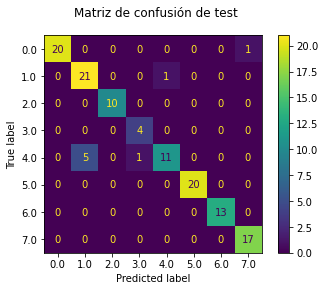

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98        21
         1.0       0.81      0.95      0.88        22
         2.0       1.00      1.00      1.00        10
         3.0       0.80      1.00      0.89         4
         4.0       0.92      0.65      0.76        17
         5.0       1.00      1.00      1.00        20
         6.0       1.00      1.00      1.00        13
         7.0       0.94      1.00      0.97        17

    accuracy                           0.94       124
   macro avg       0.93      0.94      0.93       124
weighted avg       0.94      0.94      0.93       124



In [65]:
OVO=OneVsOneClassifier(estimator=LogisticRegression(penalty='l2',max_iter=400,
                                                         solver='newton-cg',C=10.e50,random_state=42))
best_selection['Regresión Logística']=[OVO,best_params]
resultados(OVO,best_params)

**Conclusiones regresión logística sin regularización**

Aprecio que logro unos muy buenos resultados en general (sin llegar a alcanzar los resultados de los clasificadores *SVM* y *Random Forest*); sin embargo, es preocupante la confusión a la hora de clasificar datos entre la clase 1 y 4.

## Conclusiones

Llegamos al final del trabajo. En este apartado, se mostraran todos los modelos seleccionados y se tomarán la mejores alternativas. Una vez seleccione las mejores alternativas, entrenaré el modelo final con  train y finalmente clasificaré los datos del archivo *Test.txt*.

A continuación, se muestran los resultados obtenidos con los clasificadores seleccionados.

In [66]:
for i,label in enumerate(best_selection.keys()):
    print('\n','\033[4m'+'\033[1m'+'\033[36m'+label+'\033[0m')
    modelo=best_selection[label][0]
    parametros=best_selection[label][1]
    resultados(modelo,parametros,False)


 Naive Bayes
Modelo con todas las variables

       Info     Train       Val      Test  Outliers    Reales  Artificiales
0  Accuracy  0.954301  0.943548  0.935484  0.416667  0.901345      0.918495

 Red Neuronal
Modelo con todas las variables
Estructura= (25, 25, 25, 25, 25)

       Info     Train       Val      Test  Outliers    Reales  Artificiales
0  Accuracy  0.965054  0.919355  0.927419       0.5  0.919283       0.92163

 Bagging + Naive Bayes
Modelo con todas las variables
num_Clasificadores= 3

       Info     Train       Val      Test  Outliers    Reales  Artificiales
0  Accuracy  0.951613  0.943548  0.927419       0.5  0.896861      0.915361

 Random Forest
Modelo con todas las variables
num_Clasificadores= 25

       Info  Train       Val      Test  Outliers    Reales  Artificiales
0  Accuracy    1.0  0.967742  0.951613  0.666667  0.959641      0.940439

 SVC
Modelo con todas las variables
C= 10
gamma= 10
Técnica= ovo

       Info     Train       Val      Test  Outliers   Re

Previo a la selección de los mejores clasificadores, daré algunos breves comentarios sobre los resultados obtenidos. 

Principalmente se observa que todos los clasificadores han trabajado mejor con todas las variables que con las 4 seleccionadas, por lo que se puede decir que es mejor trabajar con todas las variables del conjunto que con las tomadas en la [selección de variables](#Selección-de-variables). No obstante, en el [análisis de correlacion](#Análisis-de-correlaciones) ya trate que había variables con correlación muy elevada, por lo que se podría pensar en generar una solución con mas de las 4 variables que se han tomado pero dejando alguna de las 8 fuera del modelo. Además, en casos como con el [Naive Bayes](#Naive-Bayes), se obtenía un clasificador no tan bueno como los seleccionados pero con grandes resultados haciendo uso solo de las 4 variables.

Por otro lado, entre todos los clasificadores que he seleccionado, con todos se obtiene unos resultados muy buenos en la clasificación de test (todos proporcionan *accuracys* mayores al 90%). Por ello, realmente todos estos clasificadores podrían ser una buena alternativa. De cara una investigación mas a fondo, se podría ir clasificando nuevos ejemplos y analizando que resultados se obtienen, y en base a esos resultados decidir un modelo final.

Avanzando en el tema, se observan dos clasificadores que proporcionan un *accuracy* que sobresalta sobre el resto. Se tratan del [Random Forest](#Random-Forest) y del [Support Vector Machines](#Support-Vector-Machines) con la técnica *OVO*. 

Observo que los dos ofrecen unos resultados similares en todos los aspectos. Por un lado, el *SVC* proporciona un resultado mejor en test aunque la diferencia tampoco es muy relevante. Por otro lado, el *Random Forest* ofrece unos resultados mejores en los apartados de los datos artificiales y los reales, aunque la diferencia no es elevada.

Finalmente, cumpliré el protocolo y **selecciono el modelo *SVC* (usando todas las variables, con C=10, gamma=10 y la técnica *OVO*)**; es decir, tomaré el modelo con mas *accuracy* en test (aunque utilizaré el *Random Forest* para hacer una comprobación mas tarde). A continuación, se pasa a clasificar los datos del archivo *Test.txt* con el clasificador seleccionado. Para ello crearé y entrenaré el modelo seleccionado. Una vez se ha entrenado el clasificador, predeciré los datos y obtendré su salida.

A continuación, mostraré un resultado que no corresponde con la solución final pero puede ayudar a analizar si los resultados son coherentes. Es decir, predeciré también los datos de *Test.txt* con *Random Forest*. Los resultados siguientes deberán ser parecidos a la solución final.

In [67]:
#Lectura de los datos de test
TEST = np.loadtxt('Test.txt', delimiter=',')

*Random Forest*

C:\Users\unaig\anaconda3\envs\py38ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


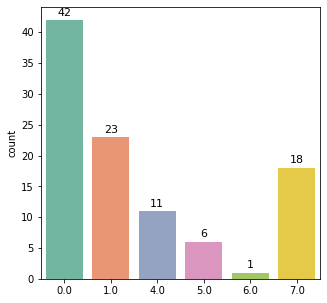

In [68]:
forest=best_selection['Random Forest'][0]
parametros=best_selection['Random Forest'][1]

forest.fit(X_train[:,parametros['Var']],y_train)

yForest=forest.predict(TEST)

countplt, ax = plt.subplots(figsize = (5,5))
ax =sns.countplot(yForest, palette="Set2");

# show count (+ annotate)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)

**SOLUCIÓN FINAL CON CLASIFICADOR SVC**

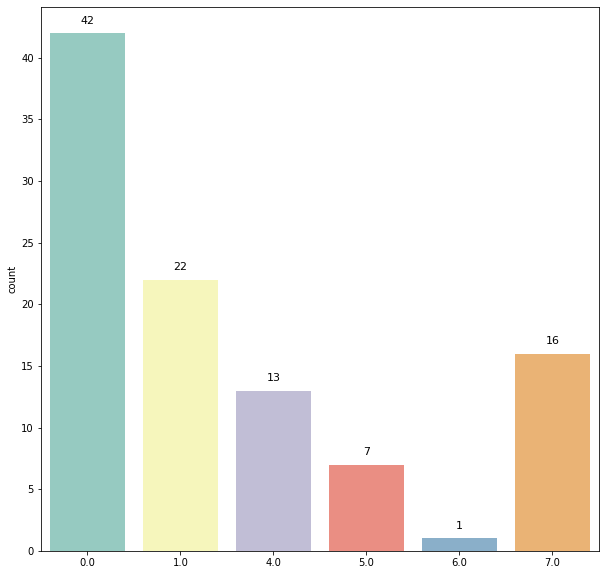

In [69]:
#Generación y entrenamiento del clasificador
svc=best_selection['SVC'][0]
parametros=best_selection['SVC'][1]
svc.fit(X_train[:,parametros['Var']],y_train)

#Predicción de los datos
yTEST=svc.predict(TEST)

#Guardamos los datos en un fichero txt
np.savetxt(fname='pred.txt', X=yTEST)

#Mostramos el resultado
countplt, ax = plt.subplots(figsize = (10,10))
ax =sns.countplot(x=yTEST, palette="Set3");

# show count (+ annotate)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)

Se logra la clasificación final de los datos a predecir. Se observa que no hay ningún dato que se clasifique como clase 2 o 3, esto considero que es algo preocupante, ya que probablemente haya datos de estas clases que no se esten detectando dada la falta de información que hay en el entrenamiento sobre estos datos. Sin embargo, se obtienen unos resultados muy parecidos con los anteriores que se han mostrado, los cuales probienen del segundo mejor calsificador generado. En consiguiente, se prevé que la clasificación lograda sea bastante exacta con los resultados finales.

**Breve comentario final**

Por último, termino el trabajo haciendo un breve comentario. Considero que el resultado final puede llegar a ofrecer una buena clasificación de los datos, dado que he seleccionado un clasificador que ofrecía la mejor solución entre varias opciones, las cuales han sido entrenadas con conjuntos de datos que no estaban tan desbalanceados como el conjunto de datos inicial. Además, considero que la eliminación de algunos *outliers* ha sido clave para mejorar el resultado final, ya que estos podían llegar haber confundido al clasificador con otras clases. En conclusión, se presupone que el resultado final sea de buena de calidad pero habría que lograr obtener mas datos, sobre todo de las clases minoritarias, para lograr un resultado realmente fiable.